## Introduction

Using the Car Sale Adverts dataset provided by AutoTrader, this research tries to develop a regression model that can predict the selling price of cars based on numerous parameters. Data preparation, feature engineering, feature selection, dimensionality reduction, model selection, tuning, fitting, assembly, assessment, and analysis are all part of the project. The study intends to find underlying relationships and variations in the data that may affect car pricing by exploring data patterns and conducting association and group differences analysis. This project's findings will have practical ramifications in the automotive industry, and it will provide an opportunity to use transferable skills and traits applicable in both industry and research settings.

### Aims & Goals

	To investigate a dataset of Car Sale Adverts provided by AutoTrader.

	Identifying relevant relationships and developing a regression model capable of predicting car selling prices based on numerous parameters.

	To obtain and analyse data on various aspects that may influence car costs using various data science approaches.

	To identify underlying relationships and changes in data that may influence car prices.

	To develop a better knowledge of the problem at hand and to learn to evaluate the strengths and limits of various models.

	Consolidate knowledge from the Advanced Machine Learning unit by developing a working solution to a real-world, industry-based machine learning challenge.

	To have a tangible impact in the automobile sector by allowing stakeholders to make well-informed purchasing decisions.

### Hypotheses 

1. Luxury brands and models command greater prices than economy brands and models, which are strong predictors of car pricing.


2. Mileage and automobile age are negatively connected with selling price, which means that when these parameters grow, so does the price.


3. Cars with unusual or unusual colours (for example, vivid pink or neon green) may have a higher or lower selling price than more typical colours such as black or white.


4. The type of vehicle (e.g., sedan, SUV, truck) has a considerable influence on selling price, with certain types of vehicles being more expensive on average.


## 1. Data Processing for Machine Learning

### 1.1 Import the Dataset and Preview

In [9]:
#!pip install --upgrade scikit-learn

In [10]:
#!pip install --upgrade scikit-learn==1.2.2 --user

In [11]:
#!pip install category_encoders

In [12]:
#!pip install xgboost

In [13]:
#!pip install seaborn

In [14]:
# Import the necessary libraries
import warnings
from sklearn.exceptions import DataConversionWarning
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from functools import partial
rmse = partial(mean_squared_error, squared=False)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import math

In [15]:
# suppress warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=RuntimeWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_palette("viridis")
set_config(display='diagram')

In [16]:
# Load the data
rawdata=pd.read_csv("C:\\Users\\22540050\\OneDrive - MMU\\ANSA\\Semester 2\\Advanced ML\\adverts.csv")
rawdata

public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \
0                    XC90               NEW                   NaN  73970   
1                      XF              USED                2011.0   7000   
2                    Yeti              USED                2017.0  14000   
3                   Mokka              USED                2016.0   7995   
4       Range Rover Sport              USED                2015.0  26995   
...                   ...               ...                   ...    ...   
402000                208              USED                2019.0  10595   
402001                107              USED                2009.0   2000   
402002            Qashqai              USED                2012.0   7250   
402003                595              USED                2015.0  11490   
402004           A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
1          Saloon                  False                 Diesel  
2             SUV                  False                 Petrol  
3       Hatchback                  False                 Diesel  
4             SUV                  False                 Diesel  
...           ...                    ...                    ...  
402000  Hatchback                  False                 Petrol  
402001  Hatchback                  False                 Petrol  
402002        SUV                  False                 Petrol  
402003  Hatchback                  False                 Petrol  
402004     Estate                  False                 Diesel  

[402005 rows x 12 columns]

In [17]:
# Find the  type of variables

numerical= rawdata.select_dtypes('number').columns

categorical = rawdata.select_dtypes('object').columns

print(f'Numerical Columns:  {rawdata[numerical].columns}')
print('\n')
print(f'Categorical Columns: {rawdata[categorical].columns}')

Numerical Columns:  Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')


Categorical Columns: Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')


The initial impression of the features are:

   <strong>public_reference</strong> : This is a unique identifier for each vehicle in the dataset. It is a numerical variable.
    
   <strong>mileage   </strong>: This is the number of miles a vehicle has been driven. It is a numerical variable with a skewed distribution, as most vehicles will have low mileage but a few will have very high mileage.
   
   <strong>reg_code   </strong>: This is the registration code of the vehicle, which is usually a combination of letters and numbers that identifies the vehicle's make, model, and age. It is a categorical variable.
   
   <strong>standard_colour   </strong>: This is the standard color of the vehicle. It is categorical variable with a few dominant colors and many rare ones.
   
  <strong>standard_make   </strong>: This is the make of the vehicle, such as Toyota, Honda, or Ford. It is a categorical variable with a few dominant makes and many rare ones.
   
  <strong>standard_model   </strong>: This is the model of the vehicle, such as Civic, Corolla, or F-150. It a categorical variable with a few dominant models and many rare ones
    
  <strong>vehicle_condition   </strong>: This is the overall condition of the vehicle, which may be described as "new," "used," or "certified pre-owned". It is a categorical variable.
    
  <strong>year_of_registration   </strong>: This is the year in which the vehicle was registered. It is a numerical variable with a skewed distribution, as most vehicles will be relatively new but a few will be very old.
    
  <strong>price   </strong>: This is the price of the vehicle. It is a numerical variable with a skewed distribution, as most vehicles will be relatively inexpensive but a few will be very expensive.
    
  <strong>body_type   </strong>: This is the type of body of the vehicle, such as sedan, SUV, or pickup truck. It is a categorical variable with a few dominant body types and many rare ones.
    
   <strong>crossover_car_and_van   </strong>: This indicates whether the vehicle is a crossover, which is a type of vehicle that combines features of a car and a van. It is a binary categorical variable with values "yes" or "no".,
    
   <strong>fuel_type   </strong>: This is the type of fuel the vehicle uses, such as gasoline, diesel, or electric. It is a categorical variable with a few dominant fuel types and many rare ones.
   

### 1.2 Data Exploration


In my data exploration process, I review a sample of the observations to ensure the data has been properly parsed.

In [18]:
rawdata.shape

(402005, 12)

In [19]:
rawdata.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [20]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [21]:
# Check Head, Tail and Sample of data get an overview

In [22]:
# To get the first 5 rows
rawdata.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [23]:
# To get the last 5 rows
rawdata.tail()

public_reference   mileage reg_code standard_colour standard_make  \
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

       standard_model vehicle_condition  year_of_registration  price  \
402000            208              USED                2019.0  10595   
402001            107              USED                2009.0   2000   
402002        Qashqai              USED                2012.0   7250   
402003            595              USED                2015.0  11490   
402004       A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van fuel_type  
402000  Hatchback                  False    Petrol  
402001  Hatchback                  False    Petrol  
402002        SUV                  False    Petrol  
402003  Hatchback                  False    Petrol  
402004     Estate                  False    Diesel

In [24]:
rawdata.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

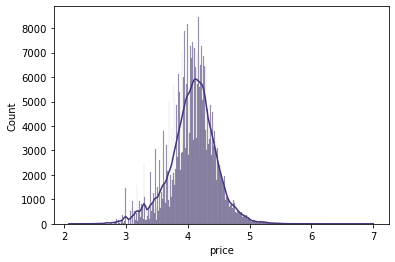

In [25]:
sns.histplot(np.log10(rawdata['price']), kde=True);

###  1.3 Find Missing Values

In this section, I will find the missing values in the dataset.

In [26]:
#Get the count and percentage of missing rows in the table

missing_Count = rawdata.isnull().sum().sort_values(ascending=False)
missing_Percentage =    (rawdata.isnull().sum()/rawdata.isnull().count()) .sort_values(ascending=False)
unique_count=rawdata.nunique()
#Concat the output values to return a dataset , setting axis=1 will make it as column
Output = pd.concat([missing_Count, missing_Percentage, unique_count], axis=1, 
                   keys=['Missing_Count', 'Missing_Percentage', 'Unique_Count'])
Output

Missing_Count  Missing_Percentage  Unique_Count
year_of_registration           33311            0.082862            84
reg_code                       31857            0.079245            72
standard_colour                 5378            0.013378            22
body_type                        837            0.002082            16
fuel_type                        601            0.001495             9
mileage                          127            0.000316         80634
public_reference                   0            0.000000        402005
standard_make                      0            0.000000           110
standard_model                     0            0.000000          1168
vehicle_condition                  0            0.000000             2
price                              0            0.000000         30578
crossover_car_and_van              0            0.000000             2

In [27]:
# Find the Range of price,
print("Range between  "+ str(rawdata['price'].min()) +"and  "+str(rawdata['price'].max()))
print("")
print("")
# Find the mean, median, and mode of the prices
print("Centrality: ")
print(" Mean: "+str(rawdata['price'].mean()))
print("  Median :"  + str(rawdata['price'].median()))
print("  Mode : "+str(rawdata['price'].mode()))
print("")
print("")
# Find the variance and standard deviation of the prices
print("Dispersion : ")
print("  variance :  "+ str(rawdata['price'].var()))
print("  standard deviation : "+ str(rawdata['price'].std())) 

Range between  120and  9999999


Centrality: 
 Mean: 17341.965798932848
  Median :12600.0
  Mode : 0    8995
Name: price, dtype: int64


Dispersion : 
  variance :  2156437779.54298
  standard deviation : 46437.46095064824


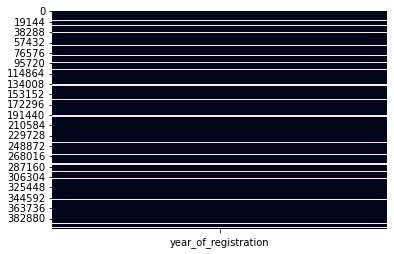

In [28]:
# create a heatmap for missing values
sns.heatmap(rawdata[["year_of_registration"]].isnull(), cbar=False)

# show the plot
plt.show()

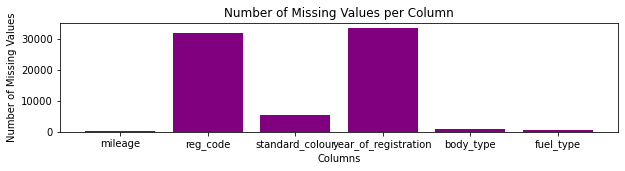

In [29]:
# Calculate the number of missing values in each column
missing = rawdata.isnull().sum()
# Remove columns with 0 missing values
missing = missing[missing> 0]
missing
# Create a bar chart
plt.figure(figsize=(10,2))
plt.bar(missing.index, missing.values,color="purple")
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values per Column')
plt.show()

###  1.4 Find Outliers and Noise

In this section, we will be examining the identification and treatment of outliers and noise in our dataset.

<AxesSubplot:xlabel='year_of_registration', ylabel='price'>

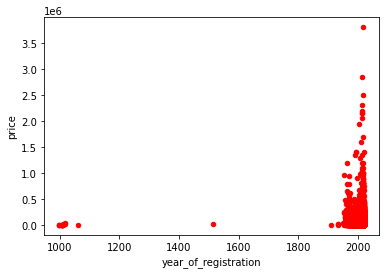

In [30]:
# The scatterplot for year and price
rawdata.plot.scatter(x = 'year_of_registration', y = 'price',c = 'red')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mileage', ylabel='price'>

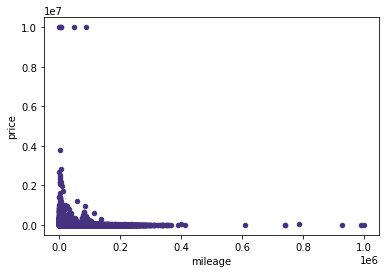

In [31]:
# The scatterplot for mileage and price
rawdata.plot.scatter(x = 'mileage', y = 'price')

## 2. Data Processing

Preprocessing data is a key phase in any data analysis project. It involves a series of techniques to clean and organize the data for further analysis. One of the important steps in data preprocessing is dealing with <strong> missing and unusual values</strong>. Missing values can appear when data is not recorded or collected correctly and can lead to inaccuracies in the analysis if not handled properly. Unusual values, also known as <strong>outliers</strong>, are data points that are significantly different from the rest of the data. These values can also cause issues in analysis if not dealt with correctly.

In [32]:
#  Count of missing values
rawdata.isnull().sum().sort_values(ascending=False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

#### 2.1 Handling Missing Values

In [33]:
#To replace all non-integer values with 0 in a column of a pandas DataFrame,
#you can use the to_numeric() function with the errors parameter set to 'coerce'. This will convert all non-integer values to NaN, which you can then replace with 0 using the fillna() function.
# Convert the 'c' column to numeric, replacing non-integer values with NaN
rawdata['reg_code'] = pd.to_numeric(rawdata['reg_code'], errors='coerce')

# Replace NaN values with 0
rawdata['reg_code'] = rawdata['reg_code'].fillna(0)

In [34]:
# Function definition to calculate the year of registration from registration code with 3 input
#I check for the vehicle type , so the NEW vehicles wont get affected 
# The year is calculated based on the reg_code with a mathematical calculation


def find_year_from_regdate(year,regcode,vehicle_condition):
    if(vehicle_condition.lower()!="new"):
        if math.isnan(year):
            if 0< regcode < 23 :
                outyear = int(regcode)+2000
            elif regcode>=23:
                outyear = int(regcode)+1950 
            else: 
                  outyear=year
        else :
            outyear=year
    else :
            outyear=year
    return outyear

In [35]:
# filter the DataFrame to only include rows with the specified make and model
# if there are no rows that match the specified make and model, return None
# if there are no rows that match the specified make and model, return None

def get_fuel_type( make, model,fuel_type):
    if(pd.isnull(fuel_type)):
        df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
        dfcol = df["fuel_type"].loc[df["fuel_type"].notna()]
        if dfcol.shape[0] == 0:
            outval=rawdata["fuel_type"].mode().iloc[0]
        else: 
            outval=dfcol.iloc[0]
    else:
        outval=fuel_type

    return outval

In [36]:
# filter the DataFrame to only include rows with the specified make and model
# if there are no rows that match the specified make and model, return None
# if there are no rows that match the specified make and model, return None

def get_body_type( make, model,body_type):
    if(pd.isnull(body_type)):
        df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
        dfcol = df["body_type"].loc[df["body_type"].notna()]
        if dfcol.shape[0] == 0:
            outval=rawdata["body_type"].mode().iloc[0]
        else: 
            outval=dfcol.iloc[0]
    else:
        outval=body_type

    return outval

In [37]:
def get_mileage( make, model,mileage,vehicle_condition):
    
    if(vehicle_condition.strip().lower()=="used"):
        if(pd.isnull(mileage) or mileage==0):
            df = rawdata[(rawdata['standard_make'] == make) & (rawdata['standard_model'] == model)]
            outval = np.mean(df.mileage)
            if(outval==np.nan):
                outval = np.mean(rawdata.mileage)
        else:
            outval=mileage
    else:
        outval=mileage
           

    return outval

#### 2.2 Handling Missing Values

outliers should be identified through the use of visualization, statistical analysis, or summary statistics, and a suitable approach to handling them, such as removing them, transforming the data, or leaving them as is, should be implemented.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='year_of_registration', ylabel='price'>

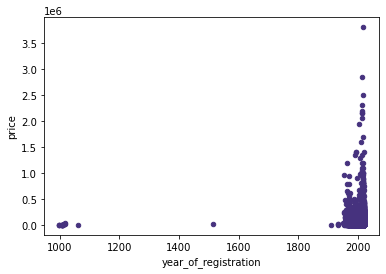

In [38]:
# scatterplot for year_of_registration vs price
rawdata.plot.scatter(x = 'year_of_registration', y = 'price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mileage', ylabel='price'>

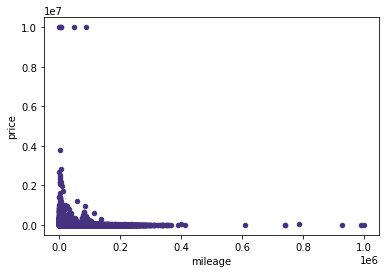

In [39]:
# scatterplot for mileage vs price
rawdata.plot.scatter(x = 'mileage', y = 'price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mileage', ylabel='price'>

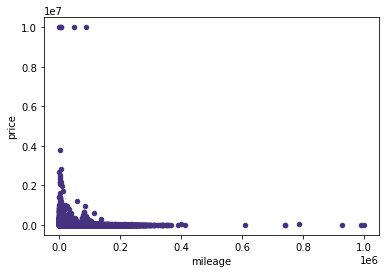

In [40]:
#try deleting the outliers and plot that
#rawdata= rawdata[rawdata["mileage"]<299990]
rawdata.plot.scatter(x = 'mileage', y = 'price')

In [41]:
# set the default color cycle to a list of colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['r', 'g', 'b', 'c'])


In [42]:
# Check the shape of data after removing missing values and outliers
rawdata.shape

(402005, 12)

In [43]:
class HandleMissingValuesOutlierNumericalTransformer():
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        global rawdata
        rawdata['year_of_registration'] =rawdata.apply(lambda x:find_year_from_regdate((x['year_of_registration']),
                                                             (x['reg_code']),(x['vehicle_condition'])), axis=1)
        rawdata["mileage"] = rawdata.apply(lambda x: get_mileage((x['standard_make']),(x['standard_model']),(x['mileage']),
                                                         (x['vehicle_condition'])), axis=1)
        
        #Remove the outliers in year of registration less than 1950    
        rawdata=rawdata.drop(rawdata[((rawdata['vehicle_condition']=="USED") & 
                 ((rawdata['year_of_registration']<1950)  | (rawdata['year_of_registration']> 2020)))].index)

        rawdata=rawdata.drop(rawdata[(rawdata['year_of_registration'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)
        # Remove the NAN values in Mileage where the vehicle condition is USED
        
        rawdata=rawdata.drop(rawdata[(rawdata['mileage'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)
        rawdata= rawdata[rawdata["mileage"]<299990]

        # Remove the NAN values in Mileage where the vehicle condition is USED
        rawdata=rawdata.drop(rawdata[(rawdata['mileage'].isna()) & (rawdata['vehicle_condition'] == "USED")].index)
        
        rawdata['year_of_registration'].fillna(2020, inplace=True)
        
        return rawdata;

In [44]:
class HandleMissingValuesOutlierCategoricalTransformer():
    
    def __init__(self):
        pass
    
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        global rawdata
        
        rawdata["fuel_type"] = rawdata.apply(lambda x: get_fuel_type((x['standard_make']),(x['standard_model']),
                                                             (x['fuel_type'])), axis=1)
        
        rawdata["body_type"] = rawdata.apply(lambda x: get_body_type((x['standard_make']),(x['standard_model']),
                                                             (x['body_type'])), axis=1)
        
        rawdata["standard_colour"]=rawdata["standard_colour"].fillna(rawdata["standard_colour"].mode().iloc[0])
        
        return rawdata;

## Encoding

Hypothesis: Certain combinations of category characteristics may have a greater impact on the estimated selling price than individual variables alone, according to the dataset. One-hot encoding would be appropriate for categorical variables with a small number of unique values, such as "body_type" with just 16 distinct values. One-hot encoding, on the other hand, would result in a significant number of extra columns for categorical variables with a large number of unique values, such as "standard_model" with 1168 unique values, which may result in the curse of dimensionality. Label encoding may be more appropriate in such instances.

	I used label encoding on the 'standard_make,' 'standard_model', and 'standard_colour' columns because they have a significant number of unique values and label encoding can assist minimise data dimensionality.

	For the 'body_type' and 'fuel_type' columns, I utilised one hot encoding because these columns have a small number of unique values, and one hot encoding can help capture the category information without sacrificing any information.


### One - hot Encoding

Certain combinations of category characteristics may have a greater impact on the estimated selling price than individual variables alone, according to the dataset. We can capture these combinations and perhaps increase the performance of our machine-learning models by employing one-hot encoding. 

### Target Encoding

A method for transforming category variables into numerical values based on the target variable is called target encoding. Target encoding considers the association between the categorical variable and the target variable as opposed to label encoding, which gives each category a numerical value.
Target encoding includes substituting the average value of the target variable for each category in the categorical variable. This implies that the average value of the target variable for each category is replaced with a numerical number.

### 2.3 Feature Prepossessing Pipeline

In [45]:
print(rawdata.columns)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')


#### 1.  Power Transform for Mileage 

Power transformation is a technique used to transform data to make it more normally distributed. In the context of machine learning, it can be useful to apply a power transform to certain features, such as mileage, to help improve the performance of models that assume normally distributed data. This is because many machine learning algorithms, such as linear regression and logistic regression, rely on the assumption of normally distributed data. By transforming the data to have a more normal distribution, we can improve the performance of these models

#### 2. Convert the data type by replacing the values 

Converting the feature type is a process of changing the format or data type of a feature to make it more compatible with certain data analysis tools or models. For example, in this case, the vehicle condition feature has two distinct values, "NEW" or "USED", which may be more easily represented numerically. This conversion can be done by replacing "NEW" with 1 and "USED" with 0

#### 3. Calculate the vehicle age from year of registration
#One of the most common feature engineering methods is to create new features that are the linear / polynomial combination of the existing ones. This becomes useful for providing more information to a predictive model to improve its performance.

#### 4. Remove unwanted features

Remove the features that are already encoded.

In [46]:
class FeatureEngineeringPreprocessing():
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        global rawdata
        
        mileage_df = rawdata[['mileage']]
        pt = PowerTransformer()
        mileage_df_pt = pt.fit_transform(mileage_df)
        rawdata['mileage_pt']=mileage_df_pt
        # drop the original categorical columns
        #rawdata.drop(columns=["mileage"], inplace=True)
    
        #Convert the data type by replacing the values
        rawdata['vehicle_condition'] = rawdata['vehicle_condition'].replace({'NEW': 1, 'USED': 0})
    
        #Calculate the vehicle age from year of registration
        rawdata['vehicle_age'] =datetime.datetime.now().year- rawdata['year_of_registration']
        
        rawdata.loc[rawdata['year_of_registration'].isnull(), 'vehicle_age'] = 0
    
        #Since all values are unnecessary - will drop the column
        rawdata = rawdata.drop(labels=['reg_code',"public_reference","year_of_registration"], axis=1)
        
        return rawdata;

### Rescale the Data

#### Hypothesis
 Rescaling the data using standardization or min-max scaling can improve the performance of machine learning models by ensuring that all features are on the same scale, thereby preventing certain features from dominating others. I tried both MinMaxScaler and StandardScaler and found MinMax have better performance on models. 

#### Analysis 
    “ If the data has a normal distribution and a relatively small range, then standardization (Z-score normalization) can be a good option. If the data has a wide range and does not have a normal distribution, then Min-Max Scaling may be more appropriate.”


## Feature Engineering

Text(0, 0.5, 'mileage')

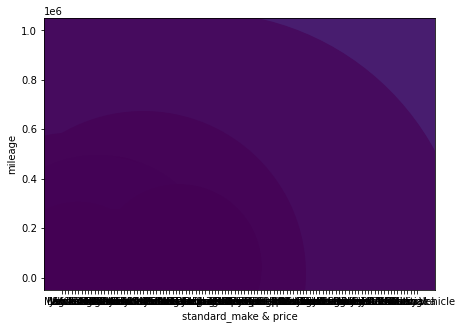

In [47]:
fig,ax=plt.subplots(figsize=(7,5))
ax.scatter(rawdata['standard_make'],rawdata['mileage'],s=rawdata['price'],c=rawdata['price']);
ax.set_xlabel('standard_make & price');
ax.set_ylabel('mileage')

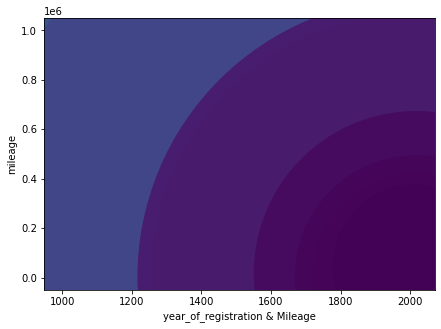

In [48]:

fig,ax=plt.subplots(figsize=(7,5))
ax.scatter(rawdata['year_of_registration'],rawdata['mileage'],s=rawdata['price'],c=rawdata['price']);
ax.set_xlabel('year_of_registration & Mileage');
ax.set_ylabel('mileage');

Before separating the data, I used some feature engineering approaches to improve the dataset's quality. First, I used Power Transformation on the Mileage feature to convert the data to a normal distribution. I transformed the "USED/NEW" feature to aid in the data's simplicity for simpler interpretation and visualisation. Computed the age of each vehicle in the dataset. This additional element aided in better understanding the relationship between the vehicle's age. Removed the features that were no longer relevant for modelling. Finally, I tested the impact of various scaling approaches, such as MinMax and Standardisation, on the performance of machine learning models. To guarantee that the generated subsets were representative of the original dataset, all of these pre-processing stages were conducted before splitting the data into train, validation, and test sets.

With the insights I obtained from the Machine Learning project I did last semester and research in the Auto resale industry; I was able to identify the most important features for the project. Based on my previous experience, I have chosen standard make, body type, mileage, and vehicle age as the most relevant features for this dataset. I felt all these features are interdependent. 


In [49]:
preprocessor = Pipeline(
    steps=[
        ("Custom_imputer_Num", HandleMissingValuesOutlierCategoricalTransformer()),
        ("Custom_imputer_cat", HandleMissingValuesOutlierNumericalTransformer()),
        ("feature_preprocessing", FeatureEngineeringPreprocessing())
    ]
)
preprocessor

Pipeline(steps=[('Custom_imputer_Num',
                 <__main__.HandleMissingValuesOutlierCategoricalTransformer object at 0x00000236941BDEE0>),
                ('Custom_imputer_cat',
                 <__main__.HandleMissingValuesOutlierNumericalTransformer object at 0x00000236941BD580>),
                ('feature_preprocessing',
                 <__main__.FeatureEngineeringPreprocessing object at 0x00000236941BD430>)])

In [50]:
rawdata= preprocessor.fit_transform(rawdata)

In [51]:
#  Count of missing values
rawdata.isnull().sum().sort_values(ascending=False)

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
mileage_pt               0
vehicle_age              0
dtype: int64

### Data Sampling
We have many data sampling techniques including Simple random sampling, Stratified sampling, Cluster sampling, Systematic sampling, and Multi-stage sampling.

I chose to use Stratified sampling beacuase , when subsetting ou data, stratified sampling is a suitable technique to ensure representation from all standard car makes. This technique allows to divide the dataset into groups based on make, and then select a specified number of observations from each group

In [52]:
# Divide the dataset into groups based on standard_make
Sampled_vehicles_Group = rawdata.groupby('standard_make')

# Select 50 observations from each group
Sampled_vehicles_df = pd.concat([a.sample(3000,random_state=0,replace=True) for _, a in Sampled_vehicles_Group])

# Shuffle the DataFrame by row
Sampled_vehicles_df = Sampled_vehicles_df.iloc[np.random.permutation(len(Sampled_vehicles_df))]

# Reset the index of the shuffled DataFrame
Sampled_vehicles_df = Sampled_vehicles_df.reset_index(drop=True)

In [53]:
Sampled_vehicles_df

mileage standard_colour standard_make standard_model  \
0        34555.0          Bronze          Jeep        Compass   
1       180000.0          Silver    Volkswagen         Sharan   
2         2400.0          Yellow        Ultima         CAN-AM   
3        75654.0          Silver      Chrysler           300C   
4        46000.0          Silver         Noble            M12   
...          ...             ...           ...            ...   
323995    1606.0            Blue       Pilgrim           Sumo   
323996    9551.0           White         Aixam      Crossline   
323997   18000.0           Black        Lancia    Monte Carlo   
323998   12000.0           Beige    Alfa Romeo         Giulia   
323999   57000.0          Purple      Daihatsu         Sirion   

        vehicle_condition  price    body_type  crossover_car_and_van  \
0                       0  13995          SUV                  False   
1                       0   3750          MPV                  False   
2                       0  44995  Convertible                  False   
3                       0   5990       Estate                  False   
4                       0  42980        Coupe                  False   
...                   ...    ...          ...                    ...   
323995                  0  36999  Convertible                  False   
323996                  0   6300    Hatchback                  False   
323997                  0  27950        Coupe                  False   
323998                  0  17995       Saloon                  False   
323999                  0   1790    Hatchback                  False   

       fuel_type  mileage_pt  vehicle_age  
0         Diesel    0.258484          5.0  
1         Diesel    2.229094         10.0  
2         Petrol   -1.217884         16.0  
3         Diesel    1.047038         14.0  
4         Petrol    0.520446         20.0  
...          ...         ...          ...  
323995    Petrol   -1.339593         12.0  
323996    Diesel   -0.631460         10.0  
323997    Petrol   -0.245119         45.0  
323998    Petrol   -0.502547          6.0  
323999    Petrol    0.735636         17.0  

[324000 rows x 11 columns]

###  Split the Data

Model building is the crucial step of creating a machine learning model that can be utilized to forecast or decide based on input data in a machine learning project.


Data preparation: This step involves preparing the data by cleaning, transforming, and preprocessing it so that it can be used in the model building process.

Splitting the data: The data is divided into two sets: training, and testing. The model is trained on the training set, its performance is evaluated on the validation set and final evaluation is done on the test set.

The data will be divided into three. Usualy 60% of data will be used for Train , 20% will be used for testingand 20% will be used for Validation. 
We need to seperate the target and predictor variables before we do the splitting

In [54]:
# Define the target variable and the features
target='price'

X,y=Sampled_vehicles_df.drop(columns=target),Sampled_vehicles_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Encode the Data

In [55]:
numeric_features = X.select_dtypes(exclude='object').columns.tolist()
print(numeric_features)
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
).set_output(transform='pandas')

categorical_features_1 = ["fuel_type", "body_type"]
print(categorical_features_1)
categorical_transformer_1 = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')),
    ]
).set_output(transform='pandas')

categorical_features_2 = ["standard_make", "standard_model"]
if "standard_colour" in X.columns:
    categorical_features_2.append("standard_colour")
print(categorical_features_2)

categorical_transformer_2 = Pipeline(
    steps=[("target", ce.TargetEncoder())]
).set_output(transform='pandas')

feature_engg_transformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_1", categorical_transformer_1, categorical_features_1),
        ("cat_2", categorical_transformer_2, categorical_features_2),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
    
).set_output(transform="pandas")

feature_engg_transformer


['mileage', 'vehicle_condition', 'crossover_car_and_van', 'mileage_pt', 'vehicle_age']
['fuel_type', 'body_type']
['standard_make', 'standard_model', 'standard_colour']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['mileage', 'vehicle_condition',
                                  'crossover_car_and_van', 'mileage_pt',
                                  'vehicle_age']),
                                ('cat_1',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fuel_type', 'body_type']),
                                ('cat_2',
                                 Pipeline(steps=[('target', TargetEncoder())]),
                                 ['standard_make', 'standard_model',
                                  'standard_colour'])],
                  verbose_feature_names_out=False)

In [56]:
rawdata_fea=feature_engg_transformer.fit_transform(X_train,y_train)
rawdata_fea.head()

mileage  vehicle_condition  crossover_car_and_van  mileage_pt  \
212936  0.266577           -0.23221              -0.188259    0.594017   
261889  0.465976           -0.23221              -0.188259    0.737929   
214723  0.394754           -0.23221              -0.188259    0.688099   
48702  -0.940792           -0.23221              -0.188259   -1.631348   
241299  1.063960           -0.23221              -0.188259    1.104317   

        vehicle_age  fuel_type_Bi Fuel  fuel_type_Diesel  \
212936    -0.632386                0.0               1.0   
261889     1.515987                0.0               0.0   
214723     3.040639                0.0               0.0   
48702      0.268545                0.0               0.0   
241299     3.040639                0.0               0.0   

        fuel_type_Diesel Hybrid  fuel_type_Diesel Plug-in Hybrid  \
212936                      0.0                              0.0   
261889                      0.0                              0.0   
214723                      0.0                              0.0   
48702                       0.0                              0.0   
241299                      0.0                              0.0   

        fuel_type_Electric  ...  body_type_MPV  body_type_Minibus  \
212936                 0.0  ...            0.0                0.0   
261889                 0.0  ...            0.0                0.0   
214723                 0.0  ...            0.0                0.0   
48702                  0.0  ...            0.0                0.0   
241299                 0.0  ...            0.0                0.0   

        body_type_Panel Van  body_type_Pickup  body_type_SUV  \
212936                  0.0               0.0            0.0   
261889                  0.0               0.0            0.0   
214723                  0.0               0.0            0.0   
48702                   0.0               0.0            0.0   
241299                  0.0               0.0            0.0   

        body_type_Saloon  body_type_Window Van  standard_make  standard_model  \
212936               1.0                   0.0   20067.244134    14552.948825   
261889               0.0                   0.0   12950.000000    12950.000000   
214723               0.0                   0.0   23748.624106    39827.236878   
48702                0.0                   0.0   11718.646929    17995.000000   
241299               1.0                   0.0    9000.000000     9000.000000   

        standard_colour  
212936     68322.669307  
261889     14535.593607  
214723    179483.628147  
48702      68322.669307  
241299     20904.552637  

[5 rows x 32 columns]

### polynomial / basis functions and interaction features

polynomial features - try different versions and get scores to analyze.
1. with polynomail features - degree 2 and Ridge Alpha 0.1
2. With polynomail interaction only - with Ridge Alpha -0.1
3. Without any polynomail features -  and Ridge Alpha 0.1

In [49]:
#a  pipeline with polynomial degree=2, ridge alpha value=0.1 

polynomail_degree_pipe = Pipeline(
    steps=[
        ('feature_engg_transformer', feature_engg_transformer),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regr', Ridge(alpha=0.1))
    ]
).set_output(transform="pandas")

polynomail_degree_pipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('regr', Ridge(alpha=0.1))])

In [50]:
polynomail_degree_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('regr', Ridge(alpha=0.1))])

In [51]:
rmse(y_test,
     polynomail_degree_pipe.predict(X_test))

49787.31015144813

### Generating ineractions with polynomial features

In [52]:
#a pipeline with polynomial feature interaction only, no degree. 
Polynomail_interacPipe = Pipeline(
    steps=[
        ('feature_engg_transformer', feature_engg_transformer),
        ('poly', PolynomialFeatures(interaction_only = True, include_bias=False)),
        ('regr', Ridge(alpha=0.1))
    ]
).set_output(transform='pandas')

Polynomail_interacPipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regr', Ridge(alpha=0.1))])

In [53]:
Polynomail_interacPipe.fit(X_train, y_train)

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('regr', Ridge(alpha=0.1))])

In [54]:
rmse(y_test,Polynomail_interacPipe.predict(X_test))

50509.34980057066

### Pipeline without polynomial Features

In [55]:
#a pipeline without any polynomial features, with Ridge alpha=0.1

Poly_ridge = Pipeline(steps=[
    ('feature_engg_transformer', feature_engg_transformer),
    ('regr', Ridge(alpha=0.1))
]).set_output(transform='pandas')

In [56]:
Poly_ridge.fit(X_train, y_train)

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('regr', Ridge(alpha=0.1))])

In [57]:
rmse(y_test,Poly_ridge.predict(X_test))

61397.53688228319

From the results, it is evident that the 

### Find best params in polynomial featrures

In [58]:
# Create a GridSearchCV object with the hypertuning parameter grid
grid_search = GridSearchCV(
    polynomail_degree_pipe,
    param_grid={
    'poly__degree': [1, 2, 3],
    'regr__alpha': [0.001, 0.01],
    },
    scoring='neg_mean_squared_error',
    cv=5
)

In [59]:
grid_search.fit(X_train.head(1000), y_train.head(1000))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_engg_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'vehicle_condition',
                                                                          'crossover_car_and_van',
                                                                          'mileage_pt',
                                                                          'vehicle_age']),
                                                                        ('cat_1',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['fuel_type',
                                                                          'body_type']),
                                                                        ('cat_2',
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'standard_colour'])],
                                                          verbose_feature_names_out=False)),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regr', Ridge(alpha=0.1))]),
             param_grid={'poly__degree': [1, 2, 3],
                         'regr__alpha': [0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [60]:
results = pd.DataFrame(grid_search.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_poly__degree', 'param_regr__alpha', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [61]:
results[['param_poly__degree', 'param_regr__alpha', 'mean_test_score', 'std_test_score','rank_test_score']].sort_values('rank_test_score')

param_poly__degree param_regr__alpha  mean_test_score  std_test_score  \
1                  1              0.01    -8.538739e+09    4.052452e+09   
0                  1             0.001    -8.538744e+09    4.052433e+09   
4                  3             0.001    -1.192973e+10    1.489068e+10   
5                  3              0.01    -1.192973e+10    1.489068e+10   
3                  2              0.01    -4.838769e+10    5.545516e+10   
2                  2             0.001    -8.548555e+14    1.458232e+15   

   rank_test_score  
1                1  
0                2  
4                3  
5                3  
3                5  
2                6

In [62]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('regr', Ridge(alpha=0.01))])

In [63]:
rmse(
    y_test, grid_search.best_estimator_.predict(X_test)
)

76314.45943556503

In [64]:
grid = GridSearchCV(
    Polynomail_interacPipe,
    param_grid={
    'poly__degree': [1, 2],
    'regr__alpha': [0.001, 0.01],
    },
    scoring = 'neg_root_mean_squared_error',
    return_train_score=True
)

In [65]:
grid.fit(X_train.head(1000), y_train.head(1000))

GridSearchCV(estimator=Pipeline(steps=[('feature_engg_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'vehicle_condition',
                                                                          'crossover_car_and_van',
                                                                          'mileage_pt',
                                                                          'vehicle_age']),
                                                                        ('cat_1',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        spa...
                                                                         Pipeline(steps=[('target',
                                                                                          TargetEncoder())]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'standard_colour'])],
                                                          verbose_feature_names_out=False)),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('regr', Ridge(alpha=0.1))]),
             param_grid={'poly__degree': [1, 2], 'regr__alpha': [0.001, 0.01]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [66]:
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_poly__degree', 'param_regr__alpha', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [67]:
results[['param_poly__degree', 'param_regr__alpha','mean_test_score', 'std_test_score','rank_test_score']].sort_values('rank_test_score')

param_poly__degree param_regr__alpha  mean_test_score  std_test_score  \
1                  1              0.01    -8.841236e+04    2.686995e+04   
0                  1             0.001    -8.841245e+04    2.686975e+04   
3                  2              0.01    -1.274191e+05    9.644981e+04   
2                  2             0.001    -1.880828e+07    2.381287e+07   

   rank_test_score  
1                1  
0                2  
3                3  
2                4

In [68]:
best_model = grid.best_estimator_

best_model

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'crossover_car_and_van',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'standard_colour'])],
                                   verbose_feature_names_out=False)),
                ('poly',
                 PolynomialFeatures(degree=1, include_bias=False,
                                    interaction_only=True)),
                ('regr', Ridge(alpha=0.01))])

In [69]:
rmse(y_test,grid.best_estimator_.predict(X_test))

76314.45943556503

The best socre is for polyniomial degree = 2. So proceed to do with that

## Feature Selection and Dimensionality Reduction

In this section we are going to do the following tasks
 1. Exploratory Data Analysis 
 2. Manual Feature selection by Domain Knowledge
 3. Automated Feature selection
 
     1. Recursive Feature Elimination (RFE)
     2. Select K Best
     3. Sequential Feature selection - Forward
     4. Sequential Feature selection - Backward
     5. Select from Model

### Exploratory Data Analysis

Check for the data using graphs to understand better

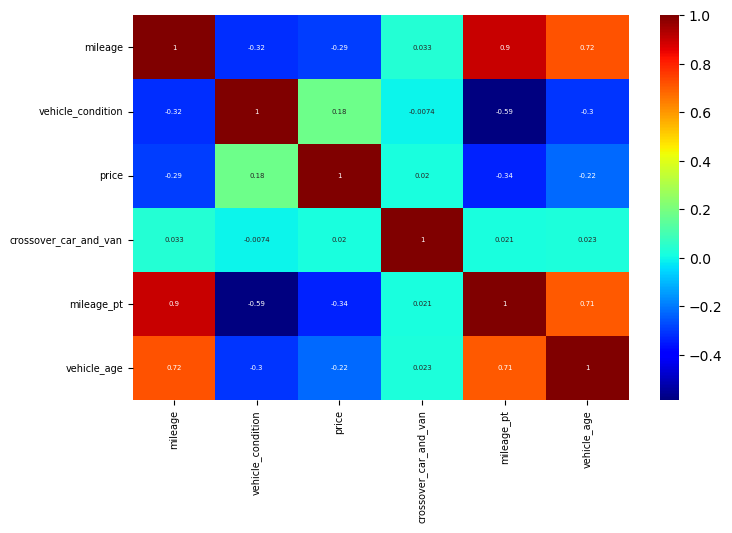

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(rawdata.corr(), annot=True, cmap='jet', annot_kws={"size": 5})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

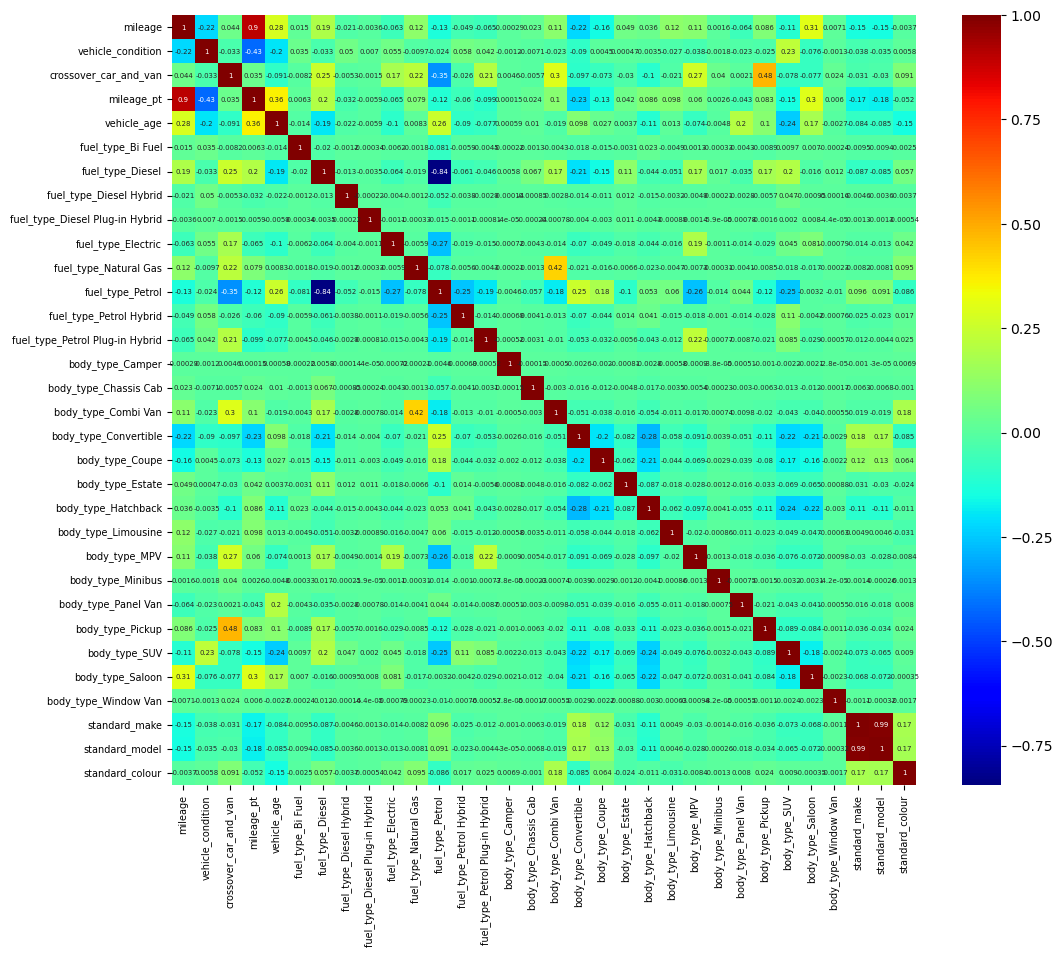

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(rawdata_fea.corr(), annot=True, cmap='jet', annot_kws={"size": 5})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [72]:
# drop the  low count columns
rawdata.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'mileage_pt', 'vehicle_age'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='body_type'>

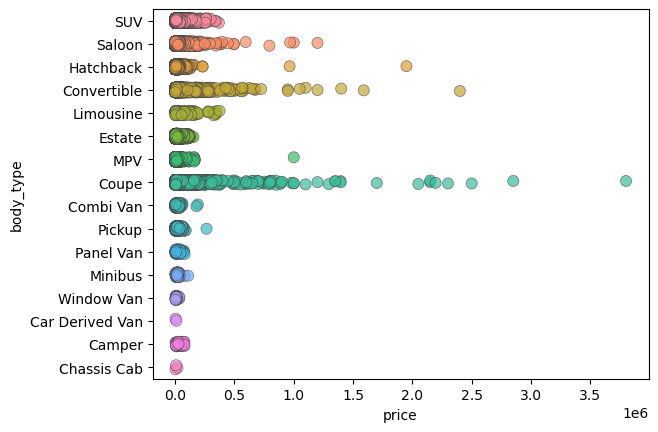

In [73]:

sns.stripplot(data=rawdata,y='body_type', x='price', 
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)

<AxesSubplot:xlabel='price', ylabel='fuel_type'>

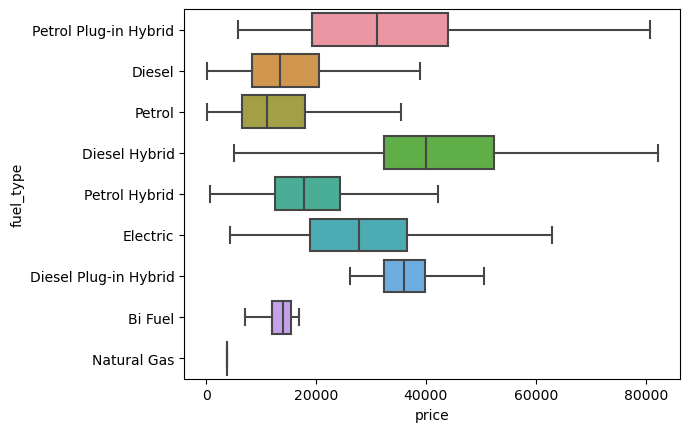

In [74]:
sns.boxplot(data=rawdata, y='fuel_type', x='price', showfliers=False)

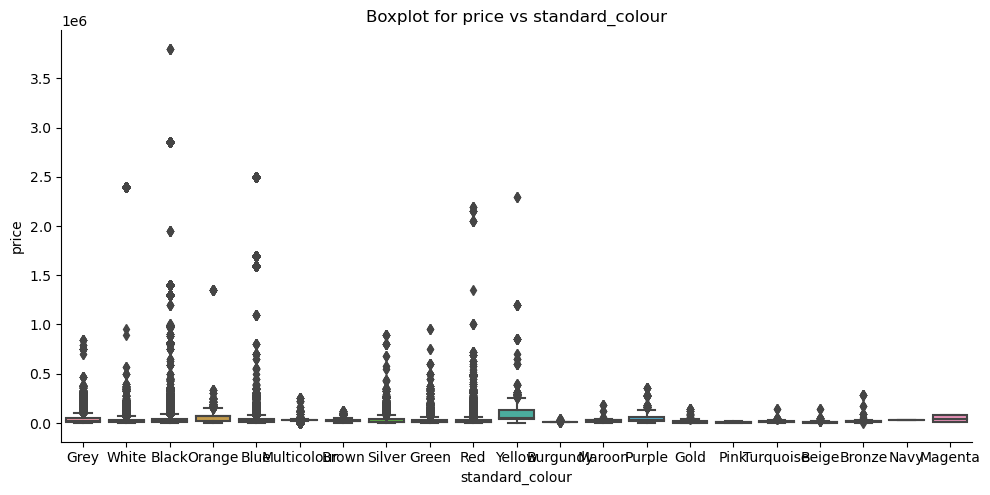

In [75]:
#Cat plot standard_colour Vs price
sns.catplot(y="price", x="standard_colour", data=Sampled_vehicles_df, kind="box", aspect=2)
plt.title("Boxplot for price vs standard_colour")
plt.show()

### Manual Feature Selection based on Domain Knowledge

Based on the exploratory analysis and domain knowledge,

1. decided to drop the columns which are not really matters. ie, 'crossover_car_and_van','standard_colour'. ie our data will have only important features like -  'standard_make', 'standard_model', 'vehicle_condition','price', 'body_type', 'fuel_type', 'mileage_pt', 'vehicle_age'
2. Decided to remove low contributing Rows for fuel type and body type to reduce the one hot encoded column numbers

In [57]:
rawdata = rawdata[['standard_make', 'standard_model', 'vehicle_condition', 'price', 'body_type', 'fuel_type', 'mileage_pt', 'vehicle_age']]
rawdata

standard_make     standard_model  vehicle_condition  price  body_type  \
0              Volvo               XC90                  1  73970        SUV   
1             Jaguar                 XF                  0   7000     Saloon   
2              SKODA               Yeti                  0  14000        SUV   
3           Vauxhall              Mokka                  0   7995  Hatchback   
4         Land Rover  Range Rover Sport                  0  26995        SUV   
...              ...                ...                ...    ...        ...   
402000       Peugeot                208                  0  10595  Hatchback   
402001       Peugeot                107                  0   2000  Hatchback   
402002        Nissan            Qashqai                  0   7250        SUV   
402003        Abarth                595                  0  11490  Hatchback   
402004          Audi           A4 Avant                  0  20520     Estate   

                    fuel_type  mileage_pt  vehicle_age  
0       Petrol Plug-in Hybrid   -2.054485          3.0  
1                      Diesel    1.490253         12.0  
2                      Petrol   -0.737127          6.0  
3                      Diesel    0.499330          7.0  
4                      Diesel    0.859137          8.0  
...                       ...         ...          ...  
402000                 Petrol   -0.928204          4.0  
402001                 Petrol    1.511744         14.0  
402002                 Petrol    0.656096         11.0  
402003                 Petrol   -0.592719          8.0  
402004                 Diesel   -0.409167          9.0  

[401575 rows x 8 columns]

In [77]:
unique_values = rawdata['body_type'].value_counts()
print(unique_values)

Hatchback          167398
SUV                115862
Saloon              36729
Estate              24721
Coupe               23235
Convertible         16132
MPV                 16043
Pickup                642
Combi Van             268
Minibus               165
Limousine             159
Camper                 85
Panel Van              75
Window Van             56
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64


In [78]:
unique_values = rawdata['fuel_type'].value_counts()
print(unique_values)

Petrol                   216874
Diesel                   158188
Petrol Hybrid             13683
Petrol Plug-in Hybrid      6195
Electric                   4792
Diesel Hybrid              1438
Bi Fuel                     219
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64


In [79]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401575 entries, 0 to 402004
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   standard_make      401575 non-null  object 
 1   standard_model     401575 non-null  object 
 2   vehicle_condition  401575 non-null  int64  
 3   price              401575 non-null  int64  
 4   body_type          401575 non-null  object 
 5   fuel_type          401575 non-null  object 
 6   mileage_pt         401575 non-null  float64
 7   vehicle_age        401575 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 27.6+ MB


In [58]:
mask = ~rawdata['fuel_type'].isin(['Natural Gas', 'Diesel Plug-in Hybrid', 'Bi Fuel'])
rawdata = rawdata[mask]

In [59]:
mask = ~rawdata['body_type'].isin(['Pickup', 'Combi Van', 'Minibus','Limousine','Camper','Panel Van','Window Van','Chassis Cab','Car Derived Van'])
rawdata = rawdata[mask]

In [60]:
rawdata

standard_make     standard_model  vehicle_condition  price  body_type  \
0              Volvo               XC90                  1  73970        SUV   
1             Jaguar                 XF                  0   7000     Saloon   
2              SKODA               Yeti                  0  14000        SUV   
3           Vauxhall              Mokka                  0   7995  Hatchback   
4         Land Rover  Range Rover Sport                  0  26995        SUV   
...              ...                ...                ...    ...        ...   
402000       Peugeot                208                  0  10595  Hatchback   
402001       Peugeot                107                  0   2000  Hatchback   
402002        Nissan            Qashqai                  0   7250        SUV   
402003        Abarth                595                  0  11490  Hatchback   
402004          Audi           A4 Avant                  0  20520     Estate   

                    fuel_type  mileage_pt  vehicle_age  
0       Petrol Plug-in Hybrid   -2.054485          3.0  
1                      Diesel    1.490253         12.0  
2                      Petrol   -0.737127          6.0  
3                      Diesel    0.499330          7.0  
4                      Diesel    0.859137          8.0  
...                       ...         ...          ...  
402000                 Petrol   -0.928204          4.0  
402001                 Petrol    1.511744         14.0  
402002                 Petrol    0.656096         11.0  
402003                 Petrol   -0.592719          8.0  
402004                 Diesel   -0.409167          9.0  

[399718 rows x 8 columns]

As we are one hot encoding the body_type and Fuel _type columns, its better to remove low contributing values to avoid unwanted columns after one hot encoding

In [61]:
# Divide the dataset into groups based on standard_make
Sampled_vehicles_Group = rawdata.groupby('standard_make')

# Select 3000 observations from each group
Sampled_vehicles_df = pd.concat([a.sample(3000,random_state=0,replace=True) for _, a in Sampled_vehicles_Group])

# Shuffle the DataFrame by row
Sampled_vehicles_df = Sampled_vehicles_df.iloc[np.random.permutation(len(Sampled_vehicles_df))]

# Reset the index of the shuffled DataFrame
Sampled_vehicles_df = Sampled_vehicles_df.reset_index(drop=True)

# Define the target variable and the features
target='price'
X,y=Sampled_vehicles_df.drop(columns=target),Sampled_vehicles_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [62]:
X_train

standard_make standard_model  vehicle_condition    body_type fuel_type  \
269409           BMW             X5                  0          SUV    Diesel   
280893        Nissan           Juke                  0          SUV    Petrol   
163340       Bristol       Blenheim                  0       Saloon    Petrol   
173099       Triumph            TR2                  0  Convertible    Petrol   
236882       Perodua           Myvi                  0    Hatchback    Petrol   
...              ...            ...                ...          ...       ...   
14585       Chrysler           300C                  0       Saloon    Petrol   
232081      Infiniti            Q50                  0       Saloon    Diesel   
82437       Cadillac            STS                  0       Saloon    Petrol   
224973       Perodua           Myvi                  0    Hatchback    Petrol   
267218        Ultima         CAN-AM                  0  Convertible    Petrol   

        mileage_pt  vehicle_age  
269409    0.128603          6.0  
280893    1.112393         13.0  
163340    1.240918         21.0  
173099   -1.828251         69.0  
236882    0.357486         14.0  
...            ...          ...  
14585     0.892840         17.0  
232081    0.103317          8.0  
82437     0.166063         14.0  
224973    0.408599         16.0  
267218   -1.217884         16.0  

[185400 rows x 7 columns]

In [63]:
numeric_features = X.select_dtypes(exclude='object').columns.tolist()
print(numeric_features)
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ]
).set_output(transform='pandas')

categorical_features_1 = ["fuel_type", "body_type"]
print(categorical_features_1)
categorical_transformer_1 = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')),
    ]
).set_output(transform='pandas')

categorical_features_2 = ["standard_make", "standard_model"]
if "standard_colour" in X.columns:
    categorical_features_2.append("standard_colour")
print(categorical_features_2)

categorical_transformer_2 = Pipeline(
    steps=[("target", ce.TargetEncoder())]
).set_output(transform='pandas')

feature_engg_transformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_1", categorical_transformer_1, categorical_features_1),
        ("cat_2", categorical_transformer_2, categorical_features_2),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
    
).set_output(transform="pandas")

feature_engg_transformer


['vehicle_condition', 'mileage_pt', 'vehicle_age']
['fuel_type', 'body_type']
['standard_make', 'standard_model']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['vehicle_condition', 'mileage_pt',
                                  'vehicle_age']),
                                ('cat_1',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fuel_type', 'body_type']),
                                ('cat_2',
                                 Pipeline(steps=[('target', TargetEncoder())]),
                                 ['standard_make', 'standard_model'])],
                  verbose_feature_names_out=False)

In [64]:
numeric_features = X.select_dtypes(exclude='object').columns.tolist()
print(numeric_features)
numeric_transformer_inter = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ('poly', PolynomialFeatures(interaction_only = True, include_bias=False)),
    ]
).set_output(transform='pandas')

categorical_features_1 = ["fuel_type", "body_type"]
print(categorical_features_1)
categorical_transformer_1 = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')),
    ]
).set_output(transform='pandas')

categorical_features_2 = ["standard_make", "standard_model"]
if "standard_colour" in X.columns:
    categorical_features_2.append("standard_colour")
print(categorical_features_2)

categorical_transformer_2 = Pipeline(
    steps=[("target", ce.TargetEncoder())]
).set_output(transform='pandas')

feature_engg_transformer_inter = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_inter, numeric_features),
        ("cat_1", categorical_transformer_1, categorical_features_1),
        ("cat_2", categorical_transformer_2, categorical_features_2),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
    
).set_output(transform="pandas")

feature_engg_transformer_inter


['vehicle_condition', 'mileage_pt', 'vehicle_age']
['fuel_type', 'body_type']
['standard_make', 'standard_model']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True))]),
                                 ['vehicle_condition', 'mileage_pt',
                                  'vehicle_age']),
                                ('cat_1',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fuel_type', 'body_type']),
                                ('cat_2',
                                 Pipeline(steps=[('target', TargetEncoder())]),
                                 ['standard_make', 'standard_model'])],
                  verbose_feature_names_out=False)

In [65]:
X_transformed,y_trn=feature_engg_transformer.fit_transform(X,y),y

In [66]:
X_transformed

vehicle_condition  mileage_pt  vehicle_age  vehicle_condition^2  \
0               -0.236175   -1.109692    -0.640271             0.055779   
1               -0.236175   -1.583417    -0.713806             0.055779   
2               -0.236175   -1.016151    -0.125528             0.055779   
3               -0.236175    1.122298     3.257068             0.055779   
4               -0.236175   -0.390485    -0.713806             0.055779   
...                   ...         ...          ...                  ...   
308995          -0.236175   -1.772686    -0.860875             0.055779   
308996          -0.236175   -0.046811    -0.125528             0.055779   
308997          -0.236175   -0.285805    -0.713806             0.055779   
308998          -0.236175   -1.137549    -0.713806             0.055779   
308999          -0.236175    0.269687     0.242146             0.055779   

        vehicle_condition mileage_pt  vehicle_condition vehicle_age  \
0                           0.262081                       0.151216   
1                           0.373963                       0.168583   
2                           0.239989                       0.029647   
3                          -0.265059                      -0.769238   
4                           0.092223                       0.168583   
...                              ...                            ...   
308995                      0.418664                       0.203317   
308996                      0.011056                       0.029647   
308997                      0.067500                       0.168583   
308998                      0.268661                       0.168583   
308999                     -0.063693                      -0.057189   

        mileage_pt^2  mileage_pt vehicle_age  vehicle_age^2  fuel_type_Diesel  \
0           1.231417                0.710504       0.409947               0.0   
1           2.507209                1.130252       0.509519               0.0   
2           1.032563                0.127555       0.015757               0.0   
3           1.259554                3.655403      10.608495               0.0   
4           0.152478                0.278730       0.509519               0.0   
...              ...                     ...            ...               ...   
308995      3.142415                1.526061       0.741106               0.0   
308996      0.002191                0.005876       0.015757               0.0   
308997      0.081684                0.204009       0.509519               1.0   
308998      1.294018                0.811989       0.509519               0.0   
308999      0.072731                0.065304       0.058634               0.0   

        ...  fuel_type_Petrol Plug-in Hybrid  body_type_Convertible  \
0       ...                              0.0                    0.0   
1       ...                              0.0                    0.0   
2       ...                              0.0                    1.0   
3       ...                              0.0                    0.0   
4       ...                              0.0                    0.0   
...     ...                              ...                    ...   
308995  ...                              0.0                    0.0   
308996  ...                              0.0                    0.0   
308997  ...                              0.0                    0.0   
308998  ...                              0.0                    1.0   
308999  ...                              0.0                    0.0   

        body_type_Coupe  body_type_Estate  body_type_Hatchback  body_type_MPV  \
0                   1.0               0.0                  0.0            0.0   
1                   1.0               0.0                  0.0            0.0   
2                   0.0               0.0                  0.0            0.0   
3                   0.0               0.0                  0.0            0.0   
4                   0.0

In [67]:
y_trn

0          107975
1          844995
2           55995
3            9000
4            6690
           ...   
308995      21975
308996       7995
308997      29995
308998    2400000
308999      17900
Name: price, Length: 309000, dtype: int64

In [68]:
X

standard_make standard_model  vehicle_condition    body_type fuel_type  \
0           Corvette            Z06                  0        Coupe    Petrol   
1            McLaren          Senna                  0        Coupe    Petrol   
2              Ariel          Nomad                  0  Convertible    Petrol   
3           Wolseley          6/110                  0       Saloon    Petrol   
4            Peugeot            108                  0    Hatchback    Petrol   
...              ...            ...                ...          ...       ...   
308995            MG          MG ZS                  0          SUV  Electric   
308996          Saab            9-5                  0       Saloon    Petrol   
308997           Kia        Sorento                  0          SUV    Diesel   
308998        Pagani         Huayra                  0  Convertible    Petrol   
308999        Hummer             H2                  0          SUV    Petrol   

        mileage_pt  vehicle_age  
0        -1.260498          6.0  
1        -1.776479          5.0  
2        -1.158613         13.0  
3         1.170588         59.0  
4        -0.477136          5.0  
...            ...          ...  
308995   -1.982631          3.0  
308996   -0.102807         13.0  
308997   -0.363119          5.0  
308998   -1.290839          5.0  
308999    0.241924         18.0  

[309000 rows x 7 columns]

In [69]:
# Divide the dataset into groups based on standard_make
Sampled_vehicles_Group = rawdata.groupby('standard_make')

# Select 50 observations from each group
Sampled_vehicles_df = pd.concat([a.sample(3000,random_state=0,replace=True) for _, a in Sampled_vehicles_Group])

# Shuffle the DataFrame by row
Sampled_vehicles_df = Sampled_vehicles_df.iloc[np.random.permutation(len(Sampled_vehicles_df))]

# Reset the index of the shuffled DataFrame
Sampled_vehicles_df = Sampled_vehicles_df.reset_index(drop=True)

# Define the target variable and the features
target='price'
X,y=Sampled_vehicles_df.drop(columns=target),Sampled_vehicles_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Automated Feature Selection

Automated feature selection is a method for choosing the dataset's key features that matter for a machine learning model. By using fewer features for training and eliminating overfitting, this can enhance the performance of the model.

In [92]:
# get the names of the output features generated by the polynomial transformation
X_polynomail_Columns = X_transformed.columns
X_polynomail_Columns

Index(['vehicle_condition', 'mileage_pt', 'vehicle_age', 'vehicle_condition^2',
       'vehicle_condition mileage_pt', 'vehicle_condition vehicle_age',
       'mileage_pt^2', 'mileage_pt vehicle_age', 'vehicle_age^2',
       'fuel_type_Diesel', 'fuel_type_Diesel Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid', 'body_type_Convertible',
       'body_type_Coupe', 'body_type_Estate', 'body_type_Hatchback',
       'body_type_MPV', 'body_type_SUV', 'body_type_Saloon', 'standard_make',
       'standard_model'],
      dtype='object')

In [93]:
len(X_polynomail_Columns)

24

### 1. Recursive Feature Elimination (RFE)

In [94]:
RFECV_Pipeline= Pipeline(
steps=[
    ('feature_engg_transformer',feature_engg_transformer),
    ("RFECV", RFECV(Ridge(),min_features_to_select=14, step=1, cv=5))
    ]
).set_output(transform="pandas").fit(X_train,y_train)

RFECV_Pipeline

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('RFECV',
                 RFECV(cv=5, estimator=Ridge(), min_features_to_select=14))])

In [95]:
# Get the selected features
selected_features = RFECV_Pipeline.named_steps["RFECV"].support_
len(selected_features)

24

In [96]:
n_scores = len(RFECV_Pipeline.named_steps["RFECV"].cv_results_["mean_test_score"])
n_scores

11

In [97]:
RFECV_Pipeline_alpha= Pipeline(
steps=[
    ('feature_engg_transformer',feature_engg_transformer),
     ("RFECV", RFECV(Ridge(alpha=0.1), step=1, cv=10))
    ]
).set_output(transform="pandas").fit(X_train,y_train)

RFECV_Pipeline_alpha    

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('RFECV', RFECV(cv=10, estimator=Ridge(alpha=0.1)))])

In [98]:
# Get the selected features
selected_features = RFECV_Pipeline_alpha.named_steps["RFECV"].support_
len(selected_features)

24

In [99]:
X_Rfe= RFECV_Pipeline.transform(X)
RFECV_Columns = X_Rfe.columns.tolist()
RFECV_Columns

['vehicle_condition',
 'mileage_pt',
 'vehicle_age',
 'vehicle_condition^2',
 'vehicle_condition mileage_pt',
 'vehicle_condition vehicle_age',
 'mileage_pt^2',
 'mileage_pt vehicle_age',
 'vehicle_age^2',
 'fuel_type_Diesel',
 'fuel_type_Diesel Hybrid',
 'fuel_type_Electric',
 'fuel_type_Petrol',
 'fuel_type_Petrol Hybrid',
 'fuel_type_Petrol Plug-in Hybrid',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Estate',
 'body_type_Hatchback',
 'body_type_MPV',
 'body_type_SUV',
 'body_type_Saloon',
 'standard_make',
 'standard_model']

In [100]:
RFECV_Pipeline['RFECV'].get_feature_names_out()

array(['vehicle_condition', 'mileage_pt', 'vehicle_age',
       'vehicle_condition^2', 'vehicle_condition mileage_pt',
       'vehicle_condition vehicle_age', 'mileage_pt^2',
       'mileage_pt vehicle_age', 'vehicle_age^2', 'fuel_type_Diesel',
       'fuel_type_Diesel Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid', 'body_type_Convertible',
       'body_type_Coupe', 'body_type_Estate', 'body_type_Hatchback',
       'body_type_MPV', 'body_type_SUV', 'body_type_Saloon',
       'standard_make', 'standard_model'], dtype=object)

In [101]:
REFCV_model = Ridge().fit(X_Rfe, y)
REFCV_scores = cross_val_score(REFCV_model, X_Rfe, y)
mean_score = REFCV_scores.mean() * 100
std_score = REFCV_scores.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")


Mean Score: 95.55%
Standard Deviation: 0.24%


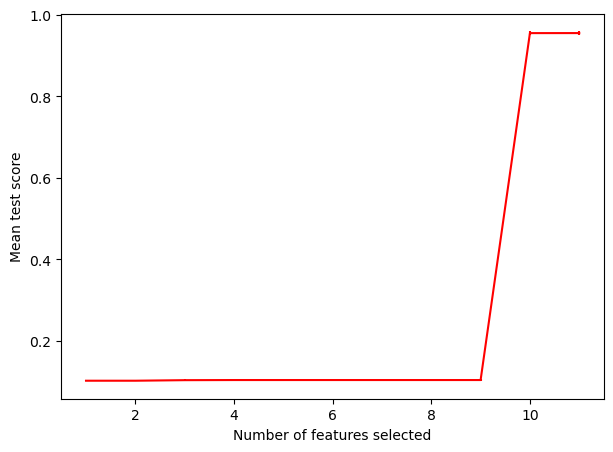

In [102]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    RFECV_Pipeline.named_steps["RFECV"].cv_results_["mean_test_score"],
    yerr=RFECV_Pipeline.named_steps["RFECV"].cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

### REFCV with interaction

In [103]:
RFECV_Pipeline_inter= Pipeline(
steps=[
    ('feature_engg_transformer_inter',feature_engg_transformer_inter),
    ("RFECV", RFECV(Ridge(), min_features_to_select=14,step=1, cv=5))
    ]
).set_output(transform="pandas").fit(X_train,y_train)

RFECV_Pipeline_inter

Pipeline(steps=[('feature_engg_transformer_inter',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('RFECV',
                 RFECV(cv=5, estimator=Ridge(), min_features_to_select=14))])

In [104]:
X_Rfe_inter= RFECV_Pipeline_inter.transform(X)

In [105]:
n_scores_in = len(RFECV_Pipeline_inter.named_steps["RFECV"].cv_results_["mean_test_score"])
n_scores_in

8

In [106]:
RFECV_Columns_inter = X_Rfe_inter.columns.tolist()
RFECV_Columns_inter

['vehicle_condition',
 'mileage_pt',
 'vehicle_age',
 'vehicle_condition mileage_pt',
 'vehicle_condition vehicle_age',
 'mileage_pt vehicle_age',
 'fuel_type_Diesel',
 'fuel_type_Diesel Hybrid',
 'fuel_type_Electric',
 'fuel_type_Petrol',
 'fuel_type_Petrol Hybrid',
 'fuel_type_Petrol Plug-in Hybrid',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Estate',
 'body_type_Hatchback',
 'body_type_MPV',
 'body_type_SUV',
 'body_type_Saloon',
 'standard_make',
 'standard_model']

In [107]:
REFCV_model_inter = Ridge().fit(X_Rfe_inter, y)
REFCV_scores_inter = cross_val_score(REFCV_model_inter, X_Rfe_inter, y)
mean_score = REFCV_scores_inter.mean() * 100
std_score = REFCV_scores_inter.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")


Mean Score: 95.54%
Standard Deviation: 0.24%


###   2. Select K Best

In [108]:
SelectK_Best = Pipeline(
steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("select_k_best", SelectKBest(f_regression, k=8))
      ]
).set_output(transform="pandas").fit(X_train,y_train)

SelectK_Best

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>))])

In [109]:
# could create a pipeline simply to get a pandas DataFrame as output
X_sel,y = SelectK_Best.transform(X),y

In [110]:
SelectK_Best['select_k_best'].get_feature_names_out()

array(['mileage_pt', 'vehicle_age', 'fuel_type_Petrol',
       'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback',
       'standard_make', 'standard_model'], dtype=object)

In [111]:
SelectKBest_Columns= X_sel.columns.tolist()
SelectKBest_Columns

['mileage_pt',
 'vehicle_age',
 'fuel_type_Petrol',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Hatchback',
 'standard_make',
 'standard_model']

In [112]:

selectKBest_model = Ridge().fit(X_sel, y)
selectK_scores = cross_val_score(selectKBest_model, X_sel, y)
mean_score = selectK_scores.mean() * 100
std_score = selectK_scores.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")


Mean Score: 95.53%
Standard Deviation: 0.24%


In [113]:
SelectK_Best_inter = Pipeline(
steps=[
        ('feature_engg_transformer_inter',feature_engg_transformer_inter),
        ("select_k_best", SelectKBest(f_regression, k=8))
      ]
).set_output(transform="pandas").fit(X_train,y_train)

SelectK_Best_inter

Pipeline(steps=[('feature_engg_transformer_inter',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>))])

In [114]:
# could create a pipeline simply to get a pandas DataFrame as output
X_sel_inter,y = SelectK_Best_inter.transform(X),y

SelectKBest_Columns_inter= X_sel_inter.columns.tolist()
SelectKBest_Columns_inter

['mileage_pt',
 'vehicle_age',
 'fuel_type_Petrol',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Hatchback',
 'standard_make',
 'standard_model']

In [115]:
selectKBest_model_inter = Ridge().fit(X_sel_inter, y)
selectK_scores_inter = cross_val_score(selectKBest_model_inter, X_sel_inter, y)
mean_score = selectK_scores_inter.mean() * 100
std_score = selectK_scores_inter.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 95.53%
Standard Deviation: 0.24%


selectKbest Model performed well in polynomial degree

### 3. Sequential Feature Selection

In [116]:
SequentialFeatureForward = Pipeline(
steps=[
     ('feature_engg_transformer',feature_engg_transformer),
     ("SequentialFeatureSelector",
        SequentialFeatureSelector(
        Ridge(), 
        n_features_to_select=8, 
        direction="forward"))
]
).set_output(transform="pandas").fit(X_train,y_train)

SequentialFeatureForward

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('SequentialFeatureSelector',
                 SequentialFeatureSelector(estimator=Ridge(),
                                           n_features_to_select=8))])

In [117]:
X_SeqFwd = SequentialFeatureForward.transform(X_train)

In [118]:
SequentialFeatureForward['SequentialFeatureSelector'].get_feature_names_out()

array(['vehicle_condition', 'mileage_pt', 'mileage_pt^2',
       'mileage_pt vehicle_age', 'body_type_Hatchback',
       'body_type_Saloon', 'standard_make', 'standard_model'],
      dtype=object)

In [119]:
SeqFeatureforward_Columns = X_SeqFwd.columns.tolist()
SeqFeatureforward_Columns

['vehicle_condition',
 'mileage_pt',
 'mileage_pt^2',
 'mileage_pt vehicle_age',
 'body_type_Hatchback',
 'body_type_Saloon',
 'standard_make',
 'standard_model']

In [120]:
#Scores with SFS(Forward)
SeqFeatureforward_model = Ridge().fit(X_SeqFwd, y_train)
SeqFeatureforward_scores = cross_val_score(SeqFeatureforward_model, X_SeqFwd, y_train)
mean_score = SeqFeatureforward_scores.mean() * 100
std_score = SeqFeatureforward_scores.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 95.49%
Standard Deviation: 0.46%


In [121]:
SequentialFeatureBackward = Pipeline(
steps=[
       ('feature_engg_transformer',feature_engg_transformer),
       ("SequentialFeatureSelector",
         SequentialFeatureSelector(
         Ridge(), 
         n_features_to_select=10, 
         direction="backward"))
]
).set_output(transform="pandas").fit(X_train,y_train)

SequentialFeatureBackward

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('SequentialFeatureSelector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=Ridge(),
                                           n_features_to_select=10))])

In [122]:
X_SeqBwd = SequentialFeatureBackward.transform(X_train)

In [123]:
SequentialFeatureBackward['SequentialFeatureSelector'].get_feature_names_out()

array(['mileage_pt', 'vehicle_condition vehicle_age', 'mileage_pt^2',
       'mileage_pt vehicle_age', 'vehicle_age^2', 'fuel_type_Electric',
       'body_type_Hatchback', 'body_type_Saloon', 'standard_make',
       'standard_model'], dtype=object)

In [124]:
SeqFeaturebackward_Columns = X_SeqBwd.columns.tolist()
SeqFeaturebackward_Columns

['mileage_pt',
 'vehicle_condition vehicle_age',
 'mileage_pt^2',
 'mileage_pt vehicle_age',
 'vehicle_age^2',
 'fuel_type_Electric',
 'body_type_Hatchback',
 'body_type_Saloon',
 'standard_make',
 'standard_model']

In [125]:
SeqFeaturebackward_model = Ridge().fit(X_SeqBwd,y_train)
SeqFeaturebackward_scores = cross_val_score(SeqFeaturebackward_model, X_SeqBwd, y_train)
mean_score = SeqFeaturebackward_scores.mean() * 100
std_score = SeqFeaturebackward_scores.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 95.49%
Standard Deviation: 0.46%


### Select From Model

In [126]:
# Define the pipeline with feature selection
Selectfrom_Model = Pipeline([
    ('feature_engg_transformer',feature_engg_transformer),
    ('SelectFromModel', 
          SelectFromModel(RandomForestClassifier(),
          threshold='median'))
]).set_output(transform="pandas").fit(X_train.head(1000), y_train.head(1000)).set_output(transform='pandas')

Selectfrom_Model

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('SelectFromModel',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='median'))])

In [127]:
X_SelModel = Selectfrom_Model.transform(X_train)

In [128]:
X_SelModel_Columns = X_SelModel.columns.tolist()
X_SelModel_Columns

['mileage_pt',
 'vehicle_age',
 'vehicle_condition mileage_pt',
 'vehicle_condition vehicle_age',
 'mileage_pt^2',
 'mileage_pt vehicle_age',
 'vehicle_age^2',
 'body_type_Convertible',
 'body_type_Hatchback',
 'body_type_SUV',
 'standard_make',
 'standard_model']

In [129]:
Selectfrom_Model['SelectFromModel'].get_feature_names_out()

array(['mileage_pt', 'vehicle_age', 'vehicle_condition mileage_pt',
       'vehicle_condition vehicle_age', 'mileage_pt^2',
       'mileage_pt vehicle_age', 'vehicle_age^2', 'body_type_Convertible',
       'body_type_Hatchback', 'body_type_SUV', 'standard_make',
       'standard_model'], dtype=object)

In [130]:
#Scores with SFS(Forward): 
Selectfrom_model = Ridge().fit(X_SelModel, y_train)
Selectfrom_modelScores = cross_val_score(Selectfrom_model, X_SelModel, y_train)
mean_score = Selectfrom_modelScores.mean() * 100
std_score = Selectfrom_modelScores.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 92.01%
Standard Deviation: 0.67%


In [131]:
# print the model scores in a table 

In [132]:
# Create a dictionary of the model outputs
model_outputs = {
    'SelectKBest': selectK_scores,
    'selectK_scores_inter': selectK_scores_inter,
    'SeqFeatureForward': SeqFeatureforward_scores,
    'SeqFeatureBackward': SeqFeaturebackward_scores,
    'RecursiveFeatureSelection': REFCV_scores,
    'RecursiveFeatureSelection': REFCV_scores_inter,
    'SelectFromModel': Selectfrom_modelScores
}

# Create an empty pandas DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Mean Score', 'Standard Deviation'])

# Loop through the model outputs dictionary and add the results to the DataFrame
for model_name, model_output in model_outputs.items():
    mean_score = model_output.mean() * 100
    std_score = model_output.std() * 100
    results_df = results_df.append({
        'Model': model_name,
        'Mean Score': f'{mean_score:.2f}%',
        'Standard Deviation': f'{std_score:.2f}%'
    }, ignore_index=True)

# Sort the results by the mean score in descending order
results_df = results_df.sort_values(by='Mean Score', ascending=False)

# Print the results DataFrame
print(results_df)


                       Model Mean Score Standard Deviation
4  RecursiveFeatureSelection     95.54%              0.24%
0                SelectKBest     95.53%              0.24%
1       selectK_scores_inter     95.53%              0.24%
2          SeqFeatureForward     95.49%              0.46%
3         SeqFeatureBackward     95.49%              0.46%
5            SelectFromModel     92.01%              0.67%


In [133]:
data = pd.DataFrame([
    X_polynomail_Columns,
    SelectKBest_Columns,
    SelectKBest_Columns_inter,
    SeqFeatureforward_Columns,
    SeqFeaturebackward_Columns,
    RFECV_Columns,
    RFECV_Columns_inter,
    X_SelModel_Columns
])

transposed_data = data.transpose()
transposed_data.columns = ['X_polynomail_Columns','SelectKBest_Columns','SelectKBest_Columns_inter', 'SeqFeatureforward_Columns', 'SeqFeaturebackward_Columns', 
                           'RFECV_Columns','RFECV_Columns_inter', 'X_SelModel_Columns']

transposed_data


X_polynomail_Columns    SelectKBest_Columns  \
0                 vehicle_condition             mileage_pt   
1                        mileage_pt            vehicle_age   
2                       vehicle_age       fuel_type_Petrol   
3               vehicle_condition^2  body_type_Convertible   
4      vehicle_condition mileage_pt        body_type_Coupe   
5     vehicle_condition vehicle_age    body_type_Hatchback   
6                      mileage_pt^2          standard_make   
7            mileage_pt vehicle_age         standard_model   
8                     vehicle_age^2                   None   
9                  fuel_type_Diesel                   None   
10          fuel_type_Diesel Hybrid                   None   
11               fuel_type_Electric                   None   
12                 fuel_type_Petrol                   None   
13          fuel_type_Petrol Hybrid                   None   
14  fuel_type_Petrol Plug-in Hybrid                   None   
15            body_type_Convertible                   None   
16                  body_type_Coupe                   None   
17                 body_type_Estate                   None   
18              body_type_Hatchback                   None   
19                    body_type_MPV                   None   
20                    body_type_SUV                   None   
21                 body_type_Saloon                   None   
22                    standard_make                   None   
23                   standard_model                   None   

   SelectKBest_Columns_inter SeqFeatureforward_Columns  \
0                 mileage_pt         vehicle_condition   
1                vehicle_age                mileage_pt   
2           fuel_type_Petrol              mileage_pt^2   
3      body_type_Convertible    mileage_pt vehicle_age   
4            body_type_Coupe       body_type_Hatchback   
5        body_type_Hatchback          body_type_Saloon   
6              standard_make             standard_make   
7             standard_model            standard_model   
8                       None                      None   
9                       None                      None   
10                      None                      None   
11                      None                      None   
12                      None                      None   
13                      None                      None   
14                      None                      None   
15                      None                      None   
16                      None                      None   
17                      None                      None   
18                      None                      None   
19                      None                      None   
20                      None                      None   
21                      None                      None   
22                      None                      None   
23                      None                      None   

       SeqFeaturebackward_Columns                    RFECV_Columns  \
0                      mileage_pt                vehicle_condition   
1   vehicle_condition vehicle_age                       mileage_pt   
2                    mileage_pt^2                      vehicle_age   
3          mileage_pt vehicle_age              vehicle_condition^2   
4                   vehicle_age^2     vehicle_condition mileage_pt   
5              fuel_type_Electric    vehicle_condition vehicle_age   
6             body_type_Hatchback                     mileage_pt^2   
7                body_type_Saloon           mileage_pt vehicle_age   
8                   standard_make                    vehicle_age^2   
9                  standard_model                 fuel_type_Diesel   
10                           None          fuel_type_Diesel Hybrid   
11                           None               fuel_type_Electric   
12                           None                 fuel_type_Petrol   
13                           None

In [134]:
data = pd.DataFrame([
    len(X_polynomail_Columns),
    len(SelectKBest_Columns),
    len(SelectKBest_Columns_inter),
    len(SeqFeatureforward_Columns),
    len(SeqFeaturebackward_Columns),
    len(RFECV_Columns),
    len(RFECV_Columns_inter),
    len(X_SelModel_Columns)
])

transposed_data = data.transpose()
transposed_data.columns = ['X_polynomail_Columns','SelectKBest_Columns_inter','SelectKBest_Columns', 'SeqFeatureforward_Columns', 'SeqFeaturebackward_Columns', 
                           'RFECV_Columns','RFECV_Columns_inter', 'X_SelModel_Columns']

transposed_data


X_polynomail_Columns  SelectKBest_Columns_inter  SelectKBest_Columns  \
0                    24                          8                    8   

   SeqFeatureforward_Columns  SeqFeaturebackward_Columns  RFECV_Columns  \
0                          8                          10             24   

   RFECV_Columns_inter  X_SelModel_Columns  
0                   21                  12

X_SelModel_Columns shows better performance as it wont aids to over fitting.

# Dimensionality Reduction

Dimensionality reduction is a method for reducing the number of features or variables in a dataset while maintaining the most important data in machine learning and data analysis. In order to more effectively visualise, analyse, and model data, it must be reduced in complexity by being transformed into a lower-dimensional space.

The basic goal of dimensionality reduction is to escape the dimensionality curse. Accurate data analysis and modelling become more difficult as the number of features in a dataset rises due to the exponential rise in computer complexity and storage needs. Additionally, overfitting, when the model fits the noise in the data instead of the underlying patterns, is a common issue with high-dimensional data.

### PCA

In [135]:
X_transformed

vehicle_condition  mileage_pt  vehicle_age  vehicle_condition^2  \
0               -0.236175    0.524514     3.183534             0.055779   
1               -0.236175   -0.102176    -0.640271             0.055779   
2               -0.236175   -1.630949     3.992416             0.055779   
3               -0.236175    1.655658     0.095076             0.055779   
4               -0.236175   -1.000988    -0.199063             0.055779   
...                   ...         ...          ...                  ...   
308995          -0.236175   -0.568990    -0.787340             0.055779   
308996          -0.236175    0.082843    -0.640271             0.055779   
308997           4.234150   -1.772686    -0.860875            17.928025   
308998          -0.236175    0.755893     1.639305             0.055779   
308999           4.234150   -1.838655    -0.860875            17.928025   

        vehicle_condition mileage_pt  vehicle_condition vehicle_age  \
0                          -0.123877                      -0.751871   
1                           0.024131                       0.151216   
2                           0.385189                      -0.942908   
3                          -0.391025                      -0.022455   
4                           0.236408                       0.047014   
...                              ...                            ...   
308995                      0.134381                       0.185950   
308996                     -0.019565                       0.151216   
308997                     -7.505818                      -3.645074   
308998                     -0.178523                      -0.387163   
308999                     -7.785143                      -3.645074   

        mileage_pt^2  mileage_pt vehicle_age  vehicle_age^2  fuel_type_Diesel  \
0           0.275115                1.669807      10.134887               0.0   
1           0.010440                0.065421       0.409947               1.0   
2           2.659996               -6.511427      15.939382               0.0   
3           2.741205                0.157414       0.009039               0.0   
4           1.001978                0.199259       0.039626               0.0   
...              ...                     ...            ...               ...   
308995      0.323749                0.447988       0.619905               0.0   
308996      0.006863               -0.053042       0.409947               1.0   
308997      3.142415                1.526061       0.741106               0.0   
308998      0.571374                1.239139       2.687321               0.0   
308999      3.380654                1.582853       0.741106               0.0   

        ...  fuel_type_Petrol Plug-in Hybrid  body_type_Convertible  \
0       ...                              0.0                    0.0   
1       ...                              0.0                    0.0   
2       ...                              0.0                    1.0   
3       ...                              0.0                    0.0   
4       ...                              0.0                    1.0   
...     ...                              ...                    ...   
308995  ...                              0.0                    0.0   
308996  ...                              0.0                    0.0   
308997  ...                              0.0                    0.0   
308998  ...                              0.0                    1.0   
308999  ...                              0.0                    0.0   

        body_type_Coupe  body_type_Estate  body_type_Hatchback  body_type_MPV  \
0                   0.0               0.0                  0.0            0.0   
1                   0.0               0.0                  0.0            0.0   
2                   0.0               0.0                  0.0            0.0   
3                   0.0               0.0                  1.0            0.0   
4                   0.0

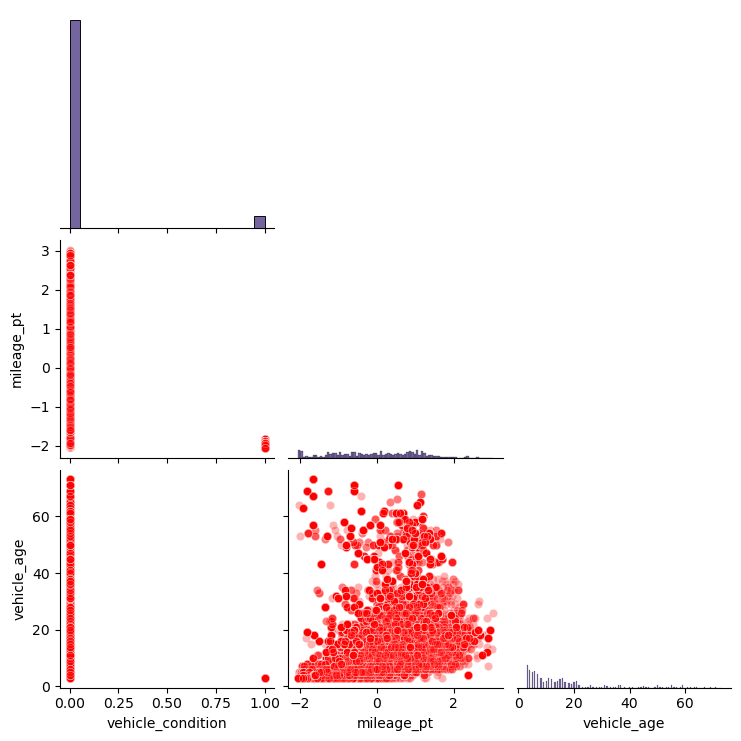

In [136]:
g = sns.pairplot(X_train, corner=True, plot_kws=dict(alpha=0.3));

In [137]:
xlim = (-4, +4)

In [138]:
# Define the pipeline with feature selection and dimensionality reduction steps
pca_full_pipeline = Pipeline([
    ('feature_engg_transformer',feature_engg_transformer),
    ("select_k_best", SelectKBest(f_regression, k=8)),
    ('PCA', PCA())
]).set_output(transform="pandas").fit(X_train, y_train).set_output(transform='pandas')

X_pca = pca_full_pipeline.transform(X_train)
X_pca[:5]

pca0          pca1      pca2      pca3      pca4      pca5  \
269409 -88638.837060    409.527866  0.451598 -0.955550  0.602741 -0.384985   
280893 -64237.493778  -1381.010402  0.918415  0.433894 -0.512428 -0.552823   
163340 -79863.352675  -1481.979837  2.574664  1.192198 -0.378821 -0.430906   
173099 -63424.695075  18284.906264  1.603204  0.465669  0.012714  0.126330   
236882 -45775.954807   3554.563743  0.220668 -0.909866 -0.411447  0.329789   

            pca6      pca7  
269409 -0.185007  0.063889  
280893 -0.080263  0.184209  
163340  0.151821  0.204897  
173099  0.010264 -0.344490  
236882  0.488699  0.012752

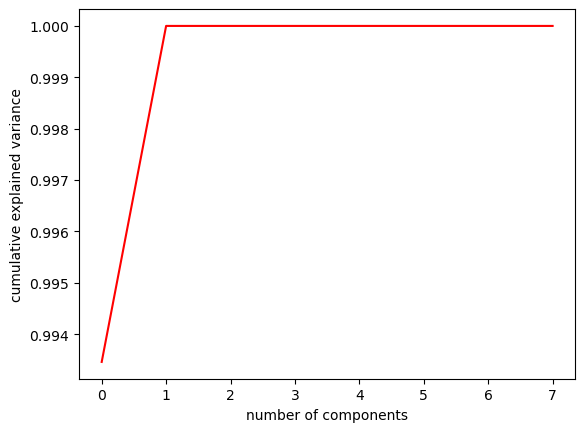

In [139]:
plt.plot(np.cumsum(pca_full_pipeline['PCA'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [140]:
print("Original shape: {}".format(str(X_transformed.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (309000, 24)
Reduced shape: (185400, 8)


In [141]:
pca_full_pipeline['PCA'].explained_variance_ratio_

array([9.93462269e-01, 6.53773128e-03, 8.18579502e-12, 4.16813719e-12,
       1.22474449e-12, 1.03909780e-12, 8.95420674e-13, 3.42364088e-13])

In [142]:
# Define the pipeline with feature selection and dimensionality reduction steps
pca_full_pipeline = Pipeline([
    ('feature_engg_transformer',feature_engg_transformer),
    ("SequentialFeatureSelector",
        SequentialFeatureSelector(
        Ridge(), 
        n_features_to_select=15, 
        direction="forward")),
    ('PCA', 
          PCA())
]).set_output(transform="pandas").fit(X_train, y_train).set_output(transform='pandas')

X_pca = pca_full_pipeline.transform(X_train)
X_pca[:5]

pca0          pca1      pca2      pca3      pca4      pca5  \
269409 -88638.837059    409.527863 -1.047294 -0.684909  0.720818  0.547452   
280893 -64237.493778  -1381.010404 -0.287765 -0.629499 -0.145841  0.003721   
163340 -79863.352676  -1481.979819  6.058081 -0.052660  0.739910 -1.235576   
173099 -63424.695075  18284.906266  1.316319 -0.488080  0.314291 -0.359433   
236882 -45775.954807   3554.563740 -0.997684 -0.775242  0.228043  0.449545   

            pca6      pca7      pca8      pca9     pca10     pca11     pca12  \
269409 -0.284852  0.677799 -0.202312  0.075257 -0.004209 -0.010490  0.013281   
280893 -0.608001 -0.149552  0.046703 -0.368176 -0.076642 -0.128286  0.060582   
163340 -0.895884  0.092416 -0.247823 -0.372708 -0.062394 -0.095576  0.082312   
173099 -0.877728 -0.315220  0.647352  0.263549 -0.001584 -0.007043 -0.063756   
236882 -0.300414 -0.655408 -0.659834  0.141067 -0.002467 -0.014588 -0.011925   

           pca13     pca14  
269409  0.014198 -0.036620  
280893  0.030241  0.079585  
163340  0.026641  0.006469  
173099 -0.017670  0.135836  
236882 -0.014583 -0.019056

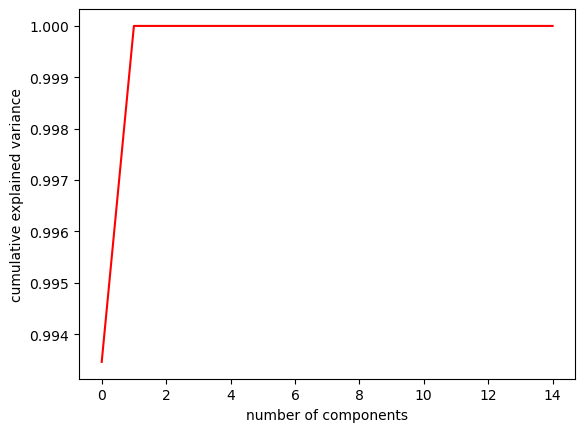

In [143]:
plt.plot(np.cumsum(pca_full_pipeline['PCA'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [144]:
X_inv_pca = pca_full_pipeline['PCA'].inverse_transform(X_pca)
X_pca.shape, X_inv_pca.shape

((185400, 15), (185400, 15))

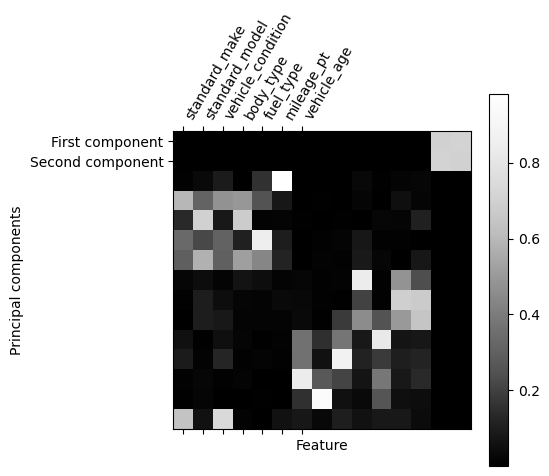

In [145]:
plt.matshow(np.abs(pca_full_pipeline['PCA'].components_), cmap='Greys_r')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

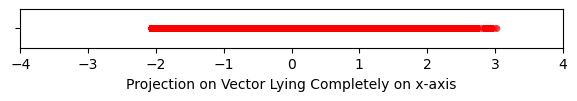

In [146]:
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=X['mileage_pt'], jitter=False, alpha=0.5, ax=ax);
ax.set_xlim(xlim)
ax.set_xlabel('Projection on Vector Lying Completely on x-axis');

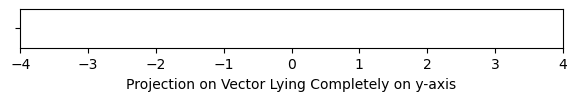

In [147]:
fig, ax = plt.subplots(figsize=(7, 0.5))
sns.stripplot(x=y, jitter=False, alpha=0.5, ax=ax);
ax.set_xlim(xlim)
ax.set_xlabel('Projection on Vector Lying Completely on y-axis');

In [148]:
# Define the pipeline with feature selection and dimensionality reduction steps
pca_pipeline = Pipeline([
    ('feature_engg_transformer',feature_engg_transformer),
    ("select_k_best", SelectKBest(f_regression, k=15)),
    ('PCA', PCA(n_components=5))
]).set_output(transform="pandas").fit(X_train, y_train).set_output(transform='pandas')

X_pca = pca_pipeline.transform(X_train)
X_pca[:5]

pca0          pca1      pca2      pca3      pca4
269409 -88638.837060    409.527865 -0.602066 -0.078604  1.046525
280893 -64237.493778  -1381.010402 -0.475155  0.890441 -0.176931
163340 -79863.352675  -1481.979837 -0.077192  3.404431 -1.309043
173099 -63424.695075  18284.906263 -0.381510  1.893980 -0.196998
236882 -45775.954807   3554.563744 -0.549345 -0.372069  1.147982

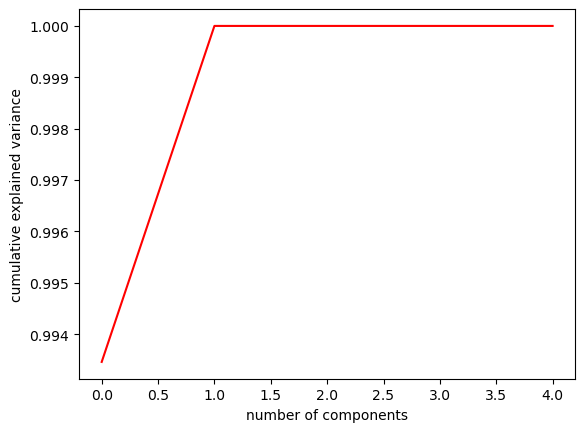

In [149]:
plt.plot(np.cumsum(pca_pipeline['PCA'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [150]:
print("Original shape: {}".format(str(X_transformed.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (309000, 24)
Reduced shape: (185400, 5)


In [151]:

# Define the pipeline with feature selection and dimensionality reduction steps
Fast_ICA = Pipeline([
     ('feature_engg_transformer',feature_engg_transformer),
     ('dimensionality_reduction', FastICA(n_components=3))
]).set_output(transform="pandas").fit(X_train,y_train)

Fast_ICA

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('dimensionality_reduction', FastICA(n_components=3))])

In [152]:
Fast_ICA['dimensionality_reduction'].get_feature_names_out()

array(['fastica0', 'fastica1', 'fastica2'], dtype=object)

In [153]:
# Define the pipeline with feature selection and dimensionality reduction steps
LinearDiscriminant = Pipeline([
     ('feature_engg_transformer',feature_engg_transformer),
    ('dimensionality_reduction', LinearDiscriminantAnalysis(n_components=3))
]).set_output(transform="pandas").fit(X_train,y_train)

LinearDiscriminant

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('dimensionality_reduction',
                 LinearDiscriminantAnalysis(n_components=3))])

In [154]:
LinearDiscriminant['dimensionality_reduction'].get_feature_names_out()

array(['lineardiscriminantanalysis0', 'lineardiscriminantanalysis1',
       'lineardiscriminantanalysis2'], dtype=object)

# Model Building

Now its time to find the best model by apply all the best polynomail, feature selection and dimentionality techniques. Now we build each of these models.
1. A Linear Model
2. A Random Forest Model
3. A Boosted Tree
4. An Averager/Voter/Stacker Ensemble

## 1.  Linear Regression Model - Ridge

In [70]:
#Building a model pipeline with polynomialfeatures and Ridge regressor 

RidgeModel_pipe = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("select_k_best", SelectKBest(f_regression, k=8)),
        ("LinearRegressionModel", Ridge())
    ]
).set_output(transform='pandas').fit(X_train, y_train)

RidgeModel_pipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000023690254B80>)),
                ('LinearRegressionModel', Ridge())])

In [71]:
rmse(y_test, RidgeModel_pipe.predict(X_test))

56687.51040915581

In [157]:
RidgeModel_pipe['LinearRegressionModel'].coef_

array([-5.95333651e+03,  8.31031518e+02,  3.00886309e+02, -3.17029840e+03,
       -1.30484315e+03,  6.34684054e+02, -6.35014942e-02,  1.06238607e+00])

In [158]:
RidgeModel_pipe['LinearRegressionModel'].intercept_

366.1639910103986

In [159]:
linearBest_model= RidgeModel_pipe.fit(X_test,y_test)
linearBest_model_val= cross_val_score(RidgeModel_pipe, X_val, y_val)
mean_score = linearBest_model_val.mean() * 100
std_score = linearBest_model_val.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 94.63%
Standard Deviation: 0.72%


### Fine Tune Model

In [72]:
# Define the hyperparameters to search over
hyperparameters = {
    'LinearRegressionModel__alpha': [0.1,0.01, 1]
}

# Create a GridSearchCV object with the pipeline and hyperparameters
grid_search = GridSearchCV(
    estimator=RidgeModel_pipe,
    param_grid=hyperparameters,
    scoring='neg_mean_squared_error',
    cv=5
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

Best hyperparameters:  {'LinearRegressionModel__alpha': 0.01}
Best cross-validation score:  4042767106.3810244


In [73]:
grid_search.cv_results_

{'mean_fit_time': array([0.56968069, 0.58982286, 0.58094759]),
 'std_fit_time': array([0.01144982, 0.02561096, 0.01181775]),
 'mean_score_time': array([0.07380133, 0.07480001, 0.0763958 ]),
 'std_score_time': array([0.01374739, 0.00339661, 0.01100873]),
 'param_LinearRegressionModel__alpha': masked_array(data=[0.1, 0.01, 1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'LinearRegressionModel__alpha': 0.1},
  {'LinearRegressionModel__alpha': 0.01},
  {'LinearRegressionModel__alpha': 1}],
 'split0_test_score': array([-3.82730905e+09, -3.82730905e+09, -3.82730902e+09]),
 'split1_test_score': array([-3.76215190e+09, -3.76215190e+09, -3.76215189e+09]),
 'split2_test_score': array([-4.32650695e+09, -4.32650695e+09, -4.32650691e+09]),
 'split3_test_score': array([-4.29948812e+09, -4.29948812e+09, -4.29948818e+09]),
 'split4_test_score': array([-3.99837952e+09, -3.99837951e+09, -3.99837956e+09]),
 'mean_test_score': array([-4.042767

In [76]:
resultsrfr,rank_test_score = pd.DataFrame(grid_search.cv_results_['params']),grid_search.cv_results_['rank_test_score']
val=resultsrfr[ 
    [ 'LinearRegressionModel__alpha']
]
val['rank_test_score']=rank_test_score
val.sort_values('rank_test_score')

LinearRegressionModel__alpha  rank_test_score
1                          0.01                1
0                          0.10                2
2                          1.00                3

In [ ]:
 #Building a model pipeline with best parameters
RidgeModel_pipe_final = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("select_k_best", SelectKBest(f_regression, k=8)),
        ("LinearRegressionModel", Ridge(alpha=1))
    ]
).set_output(transform='pandas').fit(X_train, y_train)
RidgeModel_pipe_final

In [184]:
rmse(y_val, RidgeModel_pipe_final.predict(X_val))

62707.344364991564

## 2.  Random Forest Model

In [165]:
#Building a model pipeline with polynomialfeatures and  Random forest regressor 

RandomForest_Model = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
         ("select_k_best", SelectKBest(f_regression, k=8)),
        ('regr', RandomForestRegressor(max_depth=4))
    ]
).set_output(transform='pandas')

RandomForest_Model

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>)),
                ('regr', RandomForestRegressor(max_depth=4))])

In [166]:
RandomForest_Model.fit(X_train, y_train)

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>)),
                ('regr', RandomForestRegressor(max_depth=4))])

In [167]:
rmse(y_test,
     RandomForest_Model.predict(X_test))

26629.26230506301

### Fine Tune model

In [168]:
# Define the hyperparameters to search over
hyperparameters = {
    'regr__n_estimators': [200, 300],
    'regr__max_depth': [None, 5, 10],
    'regr__min_samples_split': [2, 5]
}

# Create a GridSearchCV object with the pipeline and hyperparameters
grid_search = GridSearchCV(
    estimator=RandomForest_Model,
    param_grid=hyperparameters,
    scoring='neg_mean_squared_error',
    cv=5
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train.head(4000), y_train.head(4000),)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)


Best hyperparameters:  {'regr__max_depth': None, 'regr__min_samples_split': 2, 'regr__n_estimators': 200}
Best cross-validation score:  615016079.4964025


In [169]:
grid_search.cv_results_

{'mean_fit_time': array([1.88751612, 2.79547329, 1.64118447, 2.49759235, 0.73150115,
        1.11433606, 0.81157885, 1.10067358, 1.19753652, 1.79895391,
        1.22878184, 1.61695571]),
 'std_fit_time': array([0.03543946, 0.04998911, 0.0526152 , 0.04599201, 0.01446832,
        0.03584459, 0.06292025, 0.04344972, 0.04429135, 0.05976595,
        0.03166134, 0.04662637]),
 'mean_score_time': array([0.04770641, 0.06683574, 0.04471517, 0.06337204, 0.0280827 ,
        0.03434391, 0.02637024, 0.03082633, 0.03423715, 0.04854469,
        0.03271065, 0.04106655]),
 'std_score_time': array([0.00165011, 0.01599431, 0.00836828, 0.00061786, 0.00685293,
        0.0082755 , 0.00804319, 0.00325009, 0.00676433, 0.01278866,
        0.00374146, 0.00984288]),
 'param_regr__max_depth': masked_array(data=[None, None, None, None, 5, 5, 5, 5, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
   

In [170]:
resultsrfr,rank_test_score = pd.DataFrame(grid_search.cv_results_['params']),grid_search.cv_results_['rank_test_score']
val=resultsrfr[ 
    [ 'regr__n_estimators', 'regr__max_depth', 'regr__min_samples_split']
]
val['rank_test_score']=rank_test_score
val.sort_values('rank_test_score')

C:\Users\ansab\AppData\Local\Temp\ipykernel_5772\2464887769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['rank_test_score']=rank_test_score


regr__n_estimators  regr__max_depth  regr__min_samples_split  \
0                  200              NaN                        2   
1                  300              NaN                        2   
9                  300             10.0                        2   
10                 200             10.0                        5   
8                  200             10.0                        2   
3                  300              NaN                        5   
2                  200              NaN                        5   
11                 300             10.0                        5   
5                  300              5.0                        2   
4                  200              5.0                        2   
7                  300              5.0                        5   
6                  200              5.0                        5   

    rank_test_score  
0                 1  
1                 2  
9                 3  
10                4  
8                 5  
3                 6  
2                 7  
11                8  
5                 9  
4                10  
7                11  
6                12

In [171]:
#Building a model pipeline with polynomialfeatures and  Random forest regressor 

RandomForest_Model_Final = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
         ("select_k_best", SelectKBest(f_regression, k=8)),
        ("PCA", PCA(n_components=5)),
        ('regr', RandomForestRegressor(max_depth= None,min_samples_split=5,
                                      n_estimators=200))
    ]
).set_output(transform='pandas').fit(X_train, y_train)

RandomForest_Model_Final

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>)),
                ('PCA', PCA(n_components=5)),
                ('regr',
                 RandomForestRegressor(min_samples_split=5, n_estimators=200))])

In [172]:
rmse(y_test,
     RandomForest_Model_Final.predict(X_test))

5765.881111141169

In [173]:
RandomForest_Model_= RandomForest_Model_Final.fit(X_test,y_test)
RandomForest_Model_val= cross_val_score(RandomForest_Model_, X_val, y_val)
mean_score = RandomForest_Model_val.mean() * 100
std_score = RandomForest_Model_val.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 99.79%
Standard Deviation: 0.22%


## 3.  A Boosted Tree Model

Both xgboost and gbm follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

In [174]:
#Building a model pipeline with polynomialfeatures and XGBRegressor

xgboost_pipe = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
         ("select_k_best", SelectKBest(f_regression, k=8)),
        ('regr',xgb.XGBRegressor(objective='reg:squarederror',
                    n_estimators=100, learning_rate=0.1))
    ]
).set_output(transform='pandas').fit(X_train, y_train)

xgboost_pipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [175]:
rmse(y_test, xgboost_pipe.predict(X_test))

8893.760279215016

### Fine Tune model

In [176]:
params = {
    "regr__n_estimators": [20, 50, 100],
    "regr__learning_rate": [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(xgboost_pipe, params, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("RMSE on test set:", rmse(y_test, grid_search.predict(X_test)))

Best parameters: {'regr__learning_rate': 0.2, 'regr__n_estimators': 100}
RMSE on test set: 7367.279475868944


In [178]:
grid_search.cv_results_

{'mean_fit_time': array([1.04909425, 1.85148911, 3.06266451, 1.07116132, 2.58451838,
        4.09138217, 1.47938042, 2.41949663, 4.30631218]),
 'std_fit_time': array([0.00677748, 0.06782729, 0.0135087 , 0.01612589, 0.44111662,
        0.16546347, 0.06631303, 0.04821611, 0.15941127]),
 'mean_score_time': array([0.08062835, 0.09257736, 0.09831576, 0.09109645, 0.11922622,
        0.12191081, 0.11292248, 0.10674858, 0.12957511]),
 'std_score_time': array([0.00462472, 0.00488098, 0.0058686 , 0.00629173, 0.01422192,
        0.00610855, 0.00625314, 0.01172834, 0.00625595]),
 'param_regr__learning_rate': masked_array(data=[0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_regr__n_estimators': masked_array(data=[20, 50, 100, 20, 50, 100, 20, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
        

In [179]:

results_xgb = pd.DataFrame(grid_search.cv_results_)
selected_columns = ['param_regr__learning_rate', 'param_regr__n_estimators', 'rank_test_score']
sorted_results = results_xgb[selected_columns].sort_values('rank_test_score')

print(sorted_results)

  param_regr__learning_rate param_regr__n_estimators  rank_test_score
8                       0.2                      100                1
5                       0.1                      100                2
7                       0.2                       50                3
4                       0.1                       50                4
2                      0.05                      100                5
6                       0.2                       20                6
1                      0.05                       50                7
3                       0.1                       20                8
0                      0.05                       20                9


In [180]:
#Building a model pipeline with polynomialfeatures and XGBRegressor
XGBoost_pipeline_final = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("select_k_best", SelectKBest(f_regression, k=8)),
        ('regr',xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.2))
    ]
).set_output(transform='pandas').fit(X_train, y_train)

XGBoost_pipeline_final

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [181]:
rmse(y_test, XGBoost_pipeline_final.predict(X_test))

7367.279475868944

In [182]:
XGBoost_pipeline_= XGBoost_pipeline_final.fit(X_test,y_test)

XGBoost_pipeline_val= cross_val_score(XGBoost_pipeline_, X_val, y_val)
mean_score = XGBoost_pipeline_val.mean() * 100
std_score = XGBoost_pipeline_val.std() * 100

print(f"Mean Score: {mean_score:.2f}%")
print(f"Standard Deviation: {std_score:.2f}%")

Mean Score: 99.82%
Standard Deviation: 0.18%


In [185]:
#Output of all these models are

#Linear Model	59408.2999
#Linear Model After Fine Tune & Hyper parm testing	62707.34433
#Random Forest	26629.26231
#Random Forest-After Fine Tune & Hyper parm testing	5765.881111
#XGBoost	8893.760279
#XGBoost Hyper param tuning	7367.279476


## 3.  An Averager/Voter/Stacker Ensemble

I tried to appliy the ensemble methods like
   1. Votting
   2. Stacking
   3. Bagging
   4. Boosting

### Ensemble Regression

In [186]:
#Creating one pipeline for all models: 

def create_def_preprocessing_pipe(X):
    preprocessor = Pipeline(
        steps=[
            ('feature_engg_transformer',feature_engg_transformer),
            ("featsel", SelectKBest(f_regression, k=20)),         
            ]
        ).set_output(transform='pandas')
    return preprocessor

In [187]:
def create_regr_pipe(est, X):
    regr_pipe= Pipeline(
        steps=[
            ("pp", create_def_preprocessing_pipe(X)),
            ("regr", est)
        ]
    ).set_output(transform="pandas")
    return regr_pipe

In [188]:
gbr= create_regr_pipe(xgb.XGBRegressor(), X_train)

In [189]:
gbr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('feature_engg_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler()),
                                                                                   ('poly',
                                                                                    PolynomialFeatures(include_bias=False))]),
                                                                   ['vehicle_condition',
                                                                    'mileage_pt',
                                                                    'vehicle_age']),
                                                                  ('cat_1',
                                                                   Pipeline(steps=[('ohe',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [190]:
rfr = create_regr_pipe(
                RandomForestRegressor(
                max_depth=None,
                n_estimators=200,
                min_samples_split=5), 
                X_train)

In [191]:
ensembledgber = [gbr, rfr]

In [192]:
for est in ensembledgber :
    est.fit(X_train, y_train)

### Voting technique

In [193]:
ensembled = [ gbr, rfr]

In [194]:
# Create a VotingRegressor ensemble
voter = VotingRegressor(estimators=[("gbr", gbr), ("rfr", rfr)])
voter.fit(X_train, y_train)

# Make predictions on the test data using the VotingRegressor ensemble
y_pred_voter = voter.predict(X_test)

# Calculate the RMSE score for the VotingRegressor ensemble
rmse_voter = mean_squared_error(y_test, y_pred_voter, squared=False)

# Print the RMSE score for the VotingRegressor ensemble
print("VotingRegressor RMSE score:", rmse_voter)

VotingRegressor RMSE score: 6331.820271898304


In [195]:
all_regr = ensembled + [ voter ]

In [196]:
for est in all_regr:
    scores = cross_val_score(est, X_train.head(5000), y_train.head(5000), cv=5, scoring='neg_root_mean_squared_error')
    print(scores.mean()*-1, scores.std())
    

18021.201208369686 5483.31471707551
19205.14888892931 5927.452985896474
18189.94869738918 5799.209036420034


7493.840593484609 1274.7359816971998  for full

### Inspection of Model Output

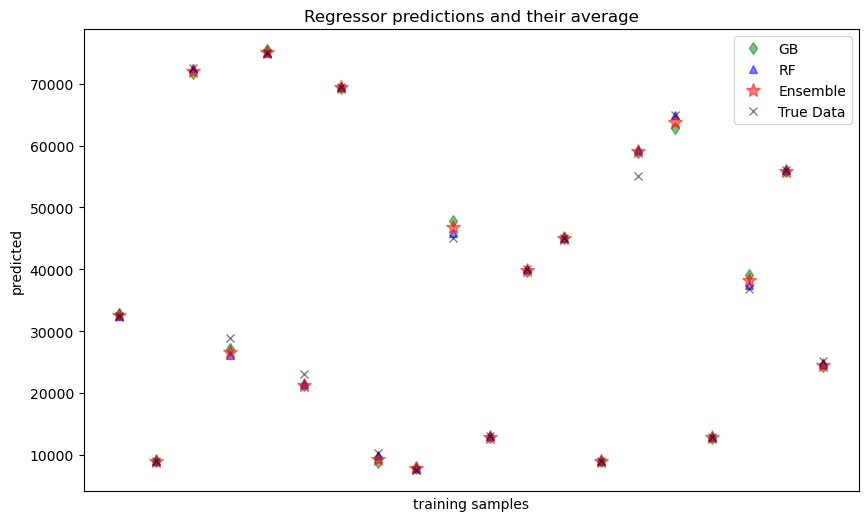

In [197]:
# quickly adapted from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html
xt = X.head(20)
pred1 = gbr.predict(xt)
pred2 = rfr.predict(xt)
pred4 = voter.predict(xt)

plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="GB")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20).values, "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [198]:
voter

VotingRegressor(estimators=[('gbr',
                             Pipeline(steps=[('pp',
                                              Pipeline(steps=[('feature_engg_transformer',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('num',
                                                                                                Pipeline(steps=[('scaler',
                                                                                                                 StandardScaler()),
                                                                                                                ('poly',
                                                                                                                 PolynomialFeatures(include_bias=False))]),
                                                                                                ['vehicle_condition',
                                                                                                 'mileage_pt',
                                                                                                 'vehicle_age']),
                                                                                               ('cat_1',
                                                                                                Pipeline(steps=[('ohe',
                                                                                                                 OneHotEnco...
                                                                                                                               handle_unknown='ignore',
                                                                                                                               sparse=False))]),
                                                                                                ['fuel_type',
                                                                                                 'body_type']),
                                                                                               ('cat_2',
                                                                                                Pipeline(steps=[('target',
                                                                                                                 TargetEncoder())]),
                                                                                                ['standard_make',
                                                                                                 'standard_model'])],
                                                                                 verbose_feature_names_out=False)),
                                                              ('featsel',
                                                               SelectKBest(k=20,
                                                                           score_func=<function f_regression at 0x0000019A183DF160>))])),
                                             ('regr',
                                              RandomForestRegressor(min_samples_split=5,
                                                                    n_estimators=200))]))])

### Stacking technique

In [199]:
# Create a StackingRegressor ensemble
stacker = StackingRegressor(
    estimators=[("gbr", gbr), ("rfr", rfr)],
    final_estimator=xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1),
    cv=5
)

In [200]:

stacker.fit(X_train.head(10000), y_train.head(10000))

# Make predictions on the test data using the StackingRegressor ensemble
y_pred_stacker = stacker.predict(X_test)

# Calculate the RMSE score for the StackingRegressor ensemble
rmse_stacker = mean_squared_error(y_test, y_pred_stacker, squared=False)

# Print the RMSE score for the StackingRegressor ensemble
print("AveragingRegressor RMSE score:", rmse_stacker)

AveragingRegressor RMSE score: 33151.56659180198


In [201]:
scores = cross_val_score(stacker, X_train.head(1000), y_train.head(1000), cv=5, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(105190.04107585705, 40153.721645821235)

In [202]:
stacker

StackingRegressor(cv=5,
                  estimators=[('gbr',
                               Pipeline(steps=[('pp',
                                                Pipeline(steps=[('feature_engg_transformer',
                                                                 ColumnTransformer(remainder='passthrough',
                                                                                   transformers=[('num',
                                                                                                  Pipeline(steps=[('scaler',
                                                                                                                   StandardScaler()),
                                                                                                                  ('poly',
                                                                                                                   PolynomialFeatures(include_bias=False))]),
                                                                                                  ['vehicle_condition',
                                                                                                   'mileage_pt',
                                                                                                   'vehicle_age']),
                                                                                                 ('cat_1',
                                                                                                  Pipeline(steps=[('ohe',
                                                                                                                   One...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...))

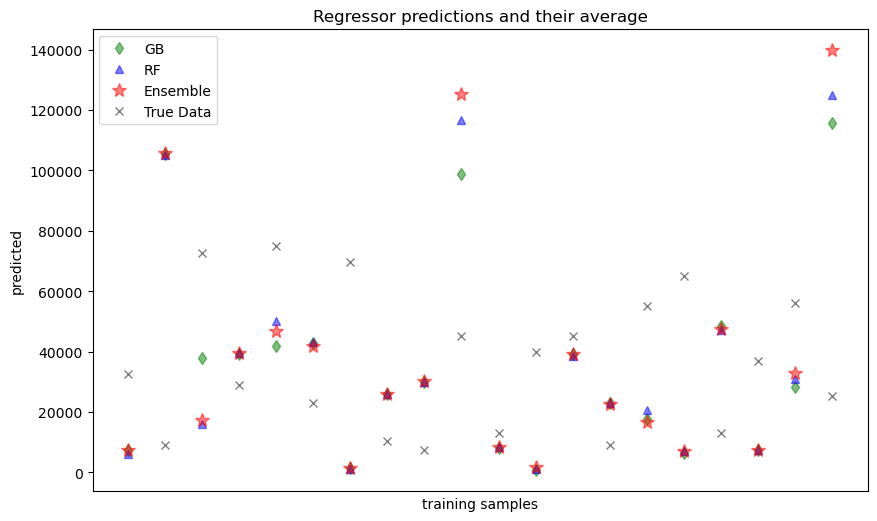

In [203]:
# quickly adapted from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html
xt = X_test.head(20)
pred1 = gbr.predict(xt)
pred2 = rfr.predict(xt)
pred4 = stacker.predict(xt)

plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="GB")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20).values, "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

### Bagging technique
   This method is the best method handle over fitting

In [204]:
# create a pipeline with PCA, Bagging and Random Forest Regression
bagging_rf_pipe = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("select_k_best", SelectKBest(f_regression, k=8)),
        ('bagging_rf', BaggingRegressor(
            base_estimator=RandomForestRegressor(
                n_estimators=100, max_depth=10, random_state=42),
            n_estimators=10, random_state=42))
    ]
)

In [205]:

# fit the pipeline with training data
bagging_rf_pipe.fit(X_train.head(10000), y_train.head(10000))

# make predictions using test data and calculate RMSE
y_pred = bagging_rf_pipe.predict(X_test)
rmse_bagging_rf = rmse(y_test, y_pred)
print("Bagging + Random Forest Regression RMSE:", rmse_bagging_rf)

Bagging + Random Forest Regression RMSE: 30870.286002224642


In [206]:
bagging_rf_pipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False...
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('select_k_best',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>)),
                ('bagging_rf',
                 BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                                       random_state=42),
                                  random_state=42))])

In [207]:
scores = cross_val_score(bagging_rf_pipe, X_train.head(1000), y_train.head(1000), cv=10, scoring='neg_root_mean_squared_error')
scores.mean()*-1, scores.std()

(77911.81441690942, 51632.96189135832)

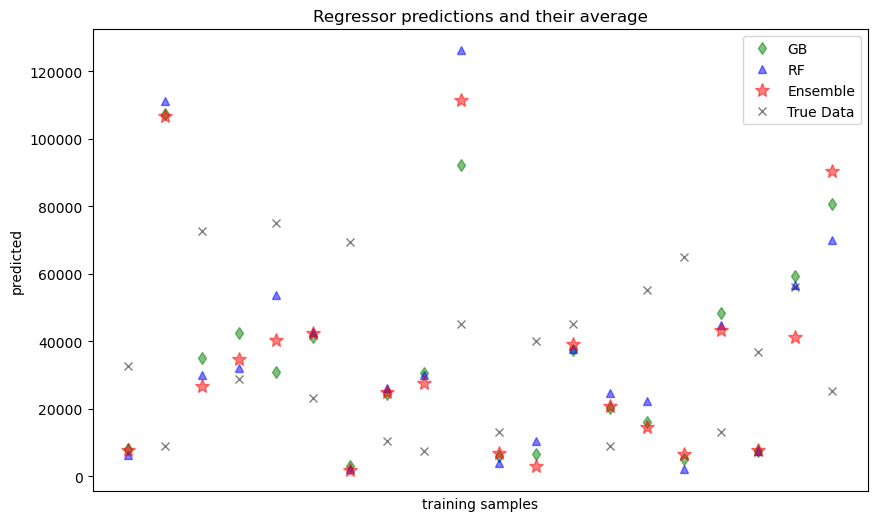

In [208]:
# quickly adapted from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html
xt = X_test.head(20)
pred1 = gbr.predict(xt)
pred2 = rfr.predict(xt)
pred4 = bagging_rf_pipe.predict(xt)

plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="GB")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

### Boosting
   This method is the best method to reducing bias

In [209]:
# define the boosting ensemble method
boost = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1)

# define the pipeline with the boosting ensemble method
pipe = Pipeline([
    ('feature_engg_transformer',feature_engg_transformer),
             ("featsel", SelectKBest(f_regression, k=8)),       
    ('boost', boost)
])
pipe

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=50,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [210]:

# fit the pipeline on the training data
pipe.fit(X_train.head(10000), y_train.head(10000))

# predict using the trained model
y_pred = pipe.predict(X_test)

# evaluate the model performance
rmse_boosting = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse_boosting}")

RMSE: 31000.3439935687


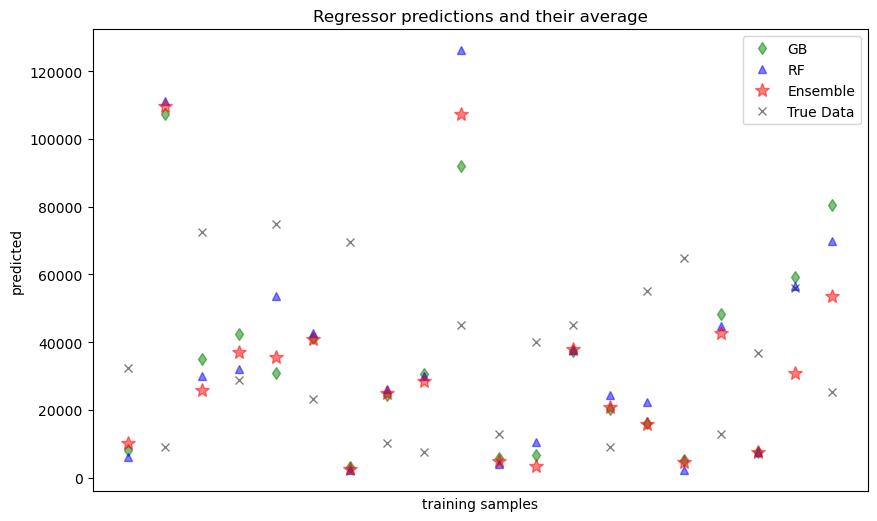

In [211]:
# quickly adapted from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html
xt = X_test.head(20)
pred1 = gbr.predict(xt)
pred2 = rfr.predict(xt)
pred4 = pipe.predict(xt)

plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="GB")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [212]:
print('rmse_voter:', rmse_voter)
print('rmse_stacker:', rmse_stacker)
print('rmse_bagging_rf:', rmse_bagging_rf)
print('rmse_boosting:', rmse_boosting)

rmse_voter: 6331.820271898304
rmse_stacker: 33151.56659180198
rmse_bagging_rf: 30870.286002224642
rmse_boosting: 31000.3439935687


Evalute best ensemble method and analysis the model performance - Choose that ensemble method to build the final method.

# Model Evaluation & Analysis

### Overall Performance with Cross-Validation

The best model is Voter and will analyse its performance with cross validation

In [213]:
from sklearn.model_selection import KFold

In [214]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
model_e = voter.fit(X_train, y_train)
scores_e = cross_val_score(model_e, X_train, y_train, cv=cv)
scores_e.mean(), scores_e.std()

(0.9991408255146537, 0.00020735106127458156)

<AxesSubplot:xlabel='price', ylabel='Density'>

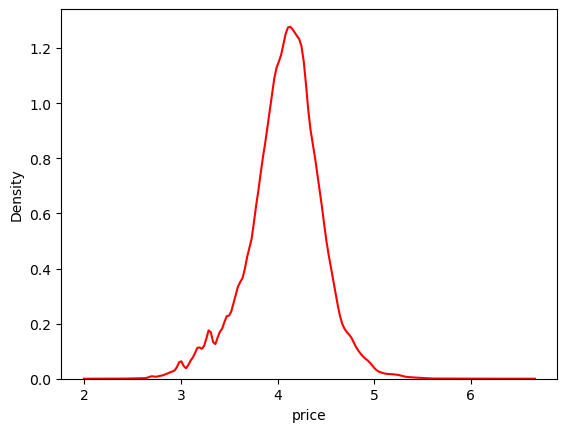

In [215]:
#check the price  distribution affecting the model
sns.kdeplot(np.log10(rawdata.loc[rawdata['price']>0, 'price']))

price feature exhibits a distribution ranging from approximately 6000 (log10 of 6000 is 3.7) to 35000 (log10 of 35000 is 4.5).

In [298]:
rawdata_price = rawdata.loc[(rawdata['price'] >= 5000) & (rawdata['price'] <= 50000)]

In [217]:
target='price'
X_final,y_final = rawdata_price.drop(columns=target), rawdata_price[target]

In [218]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_final):
    X_final_train, X_final_test = X_final.iloc[train_index], X_final.iloc[test_index]
    y_final_train, y_final_test = y_final.iloc[train_index], y_final.iloc[test_index]

In [219]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
model_ef = voter.fit(X_final_train, y_final_train)
scores_ef = cross_val_score(model_ef, X_final_train, y_final_train, cv=cv)
scores_ef.mean(), scores_ef.std()

(0.9256105670085346, 0.00035846667648676254)

In [220]:
print("%0.2f Mean &standard deviation are %0.2f" % (scores_ef.mean(), scores_ef.std()))

0.93 Mean &standard deviation are 0.00


In [221]:
y_final_test

321607     7140
321608    20995
321609    13984
321610     5791
321611    15190
          ...  
401997    18000
402000    10595
402002     7250
402003    11490
402004    20520
Name: price, Length: 65646, dtype: int64

In [222]:
y_pred=voter.predict(X_final_test)
y_val_pred=voter.predict(X_val)

In [223]:
np.array(y_pred)

array([ 6553.39123438, 19524.79691002, 13522.97918978, ...,
        7453.77186375, 10396.37299762, 16250.16364112])

In [224]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_final_test, y_pred)
mae

1623.1167196326714

In [225]:
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_val

54399.11082672347

In [226]:
from sklearn.metrics import r2_score
r2 = r2_score(y_final_test, y_pred)
r2

0.9278357666316646

In [227]:
r2_val = r2_score(y_val, y_val_pred)
r2_val

-0.030156887092033235

In [228]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_final_test, y_pred)
mse

5964587.346749228

In [229]:
mse_val = mean_squared_error(y_val, y_val_pred)
mse_val

86935702537.08018

In [230]:
from tabulate import tabulate
#calculated the metrics: mse, mse_val, r2, r2_val, mae, mae_val
metrics_data = [
    ['Metric', 'Test', 'Validation'],
    ['MSE', mse, mse_val],
    ['R-squared', r2, r2_val],
    ['MAE', mae, mae_val]
]
table = tabulate(metrics_data, headers='firstrow', tablefmt='grid')
print(table)

+-----------+----------------+-----------------+
| Metric    |           Test |      Validation |
+===========+================+=================+
| MSE       |    5.96459e+06 |     8.69357e+10 |
+-----------+----------------+-----------------+
| R-squared |    0.927836    |    -0.0301569   |
+-----------+----------------+-----------------+
| MAE       | 1623.12        | 54399.1         |
+-----------+----------------+-----------------+


### True Vs Predicted Analysis

In [231]:
def plot_true_vs_predicted(
        est, 
        X_final_train, y_final_train,
        X_final_test, y_final_test,
        ax=None,
        train_style_kws={},
        test_style_kws={}
    ):
    if ax is None:
        fig, ax = plt.subplots()
    y_pred_train = est.predict(X_final_train)
    y_pred_test = est.predict(X_final_test)
    ax.plot(y_final_train, y_pred_train, '.', label='train', **train_style_kws)
    ax.plot(y_final_test, y_pred_test, '.', label='test', **test_style_kws)
    ax.set_xlabel('True Target')
    ax.set_ylabel('Predicted Target')
    # the diagnonal line for the idealised space of predictions
    ax.plot(
        [0, 1], [0, 1], transform=ax.transAxes, 
        color='gray', linestyle=':', alpha=0.3
    )
    ax.legend()

    return ax

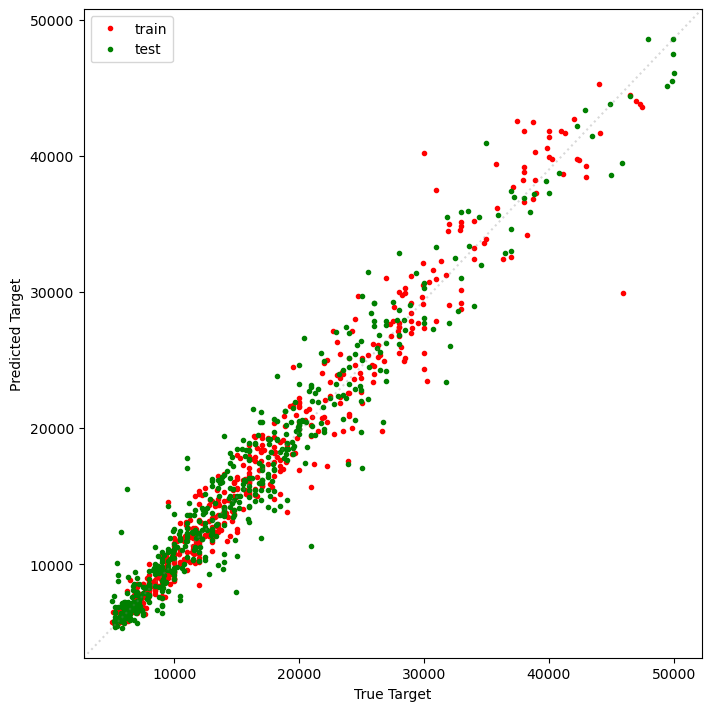

In [247]:
#On Voting ensemble model: 

fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    voter,
    X_final_train.head(500), y_final_train.head(500),
    X_final_test.head(500), y_final_test.head(500), 
    ax=ax
);

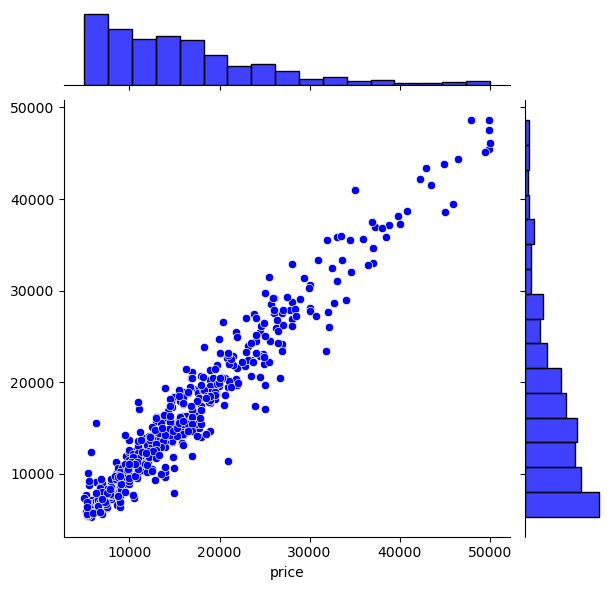

In [248]:
sns.jointplot(x=y_final_test.head(500), y=voter.predict(X_final_test.head(500)), kind='scatter', color='b')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [234]:
voter.score(X_final_test, y_final_test)

0.9278357666316646

In [235]:
rmse(y_final_test, voter.predict(X_final_test))

2442.2504676525764

In [236]:
  RandomForest_Model_Final['select_k_best'].get_feature_names_out()

array(['mileage_pt', 'vehicle_age', 'fuel_type_Petrol',
       'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback',
       'standard_make', 'standard_model'], dtype=object)

In [237]:
RandomForest_Model_Final['regr'].feature_importances_

array([0.93489973, 0.02477451, 0.01902578, 0.0131141 , 0.00818588])

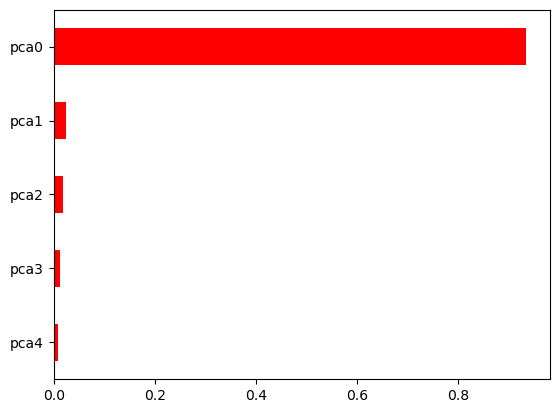

In [244]:
# Tree ensembling of removing unimportant features on Random forest best model:


def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

plot_rf_feat_imp_barh(
    RandomForest_Model_Final['regr'], 
    RandomForest_Model_Final['PCA'].get_feature_names_out()
);

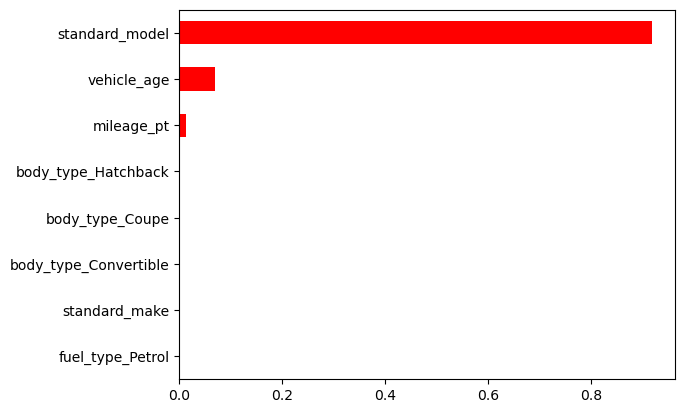

In [249]:
# Tree ensembling of removing unimportant features on Random forest best model:


def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

plot_rf_feat_imp_barh(
    RandomForest_Model['regr'], 
    RandomForest_Model['select_k_best'].get_feature_names_out()
);

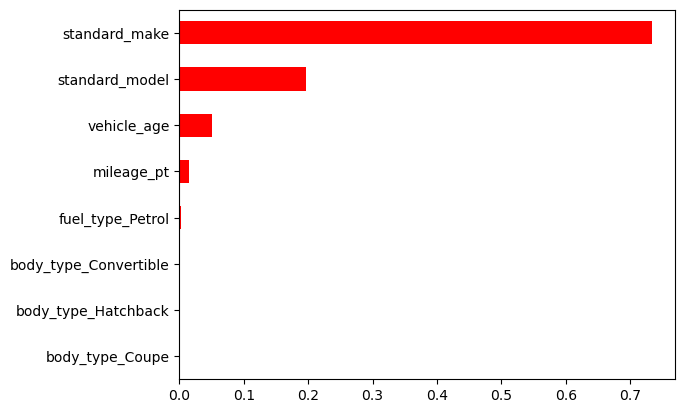

In [250]:
def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

plot_rf_feat_imp_barh(
    XGBoost_pipeline_final['regr'], 
    XGBoost_pipeline_final['select_k_best'].get_feature_names_out()
);

In [251]:
 voter.estimators_[0]

Pipeline(steps=[('pp',
                 Pipeline(steps=[('feature_engg_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler()),
                                                                                   ('poly',
                                                                                    PolynomialFeatures(include_bias=False))]),
                                                                   ['vehicle_condition',
                                                                    'mileage_pt',
                                                                    'vehicle_age']),
                                                                  ('cat_1',
                                                                   Pipeline(steps=[('ohe',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

(0.0, 40000.0)

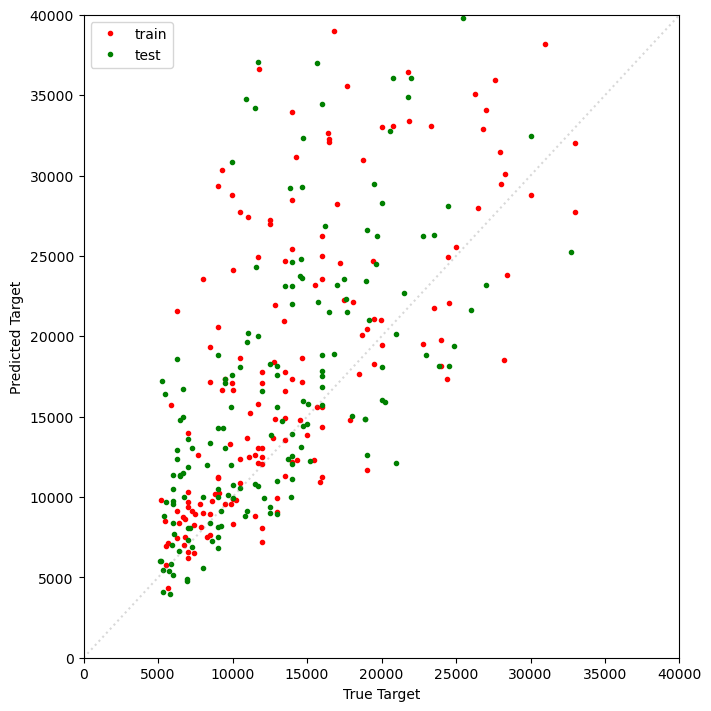

In [252]:
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    RandomForest_Model_Final,
    X_final_train.head(200), y_final_train.head(200),
    X_final_test.head(200), y_final_test.head(200), 
    ax=ax
);
plt.xlim(0,40000)
plt.ylim(0,40000)

(0.0, 40000.0)

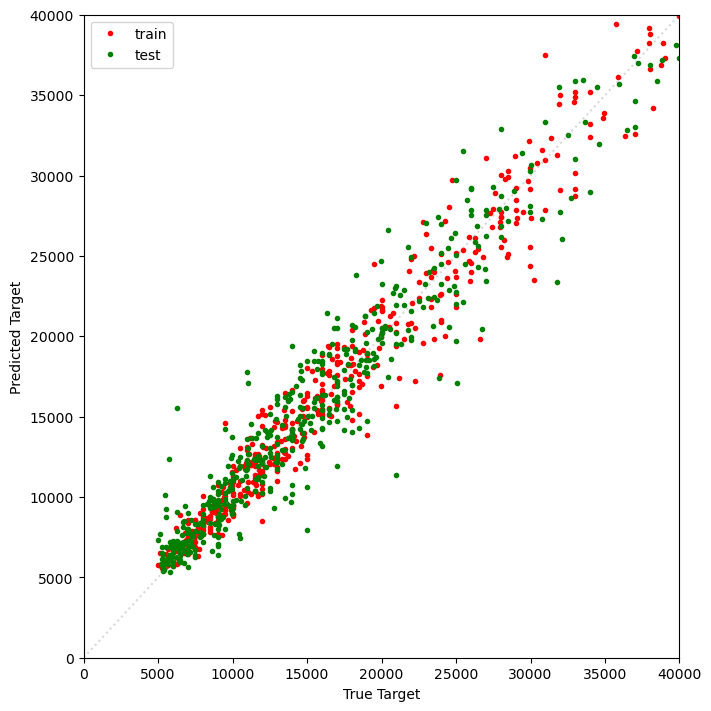

In [253]:
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    voter,
    X_final_train.head(500), y_final_train.head(500),
    X_final_test.head(500), y_final_test.head(500), 
    ax=ax
);
plt.xlim(0,40000)
plt.ylim(0,40000)

(0.0, 40000.0)

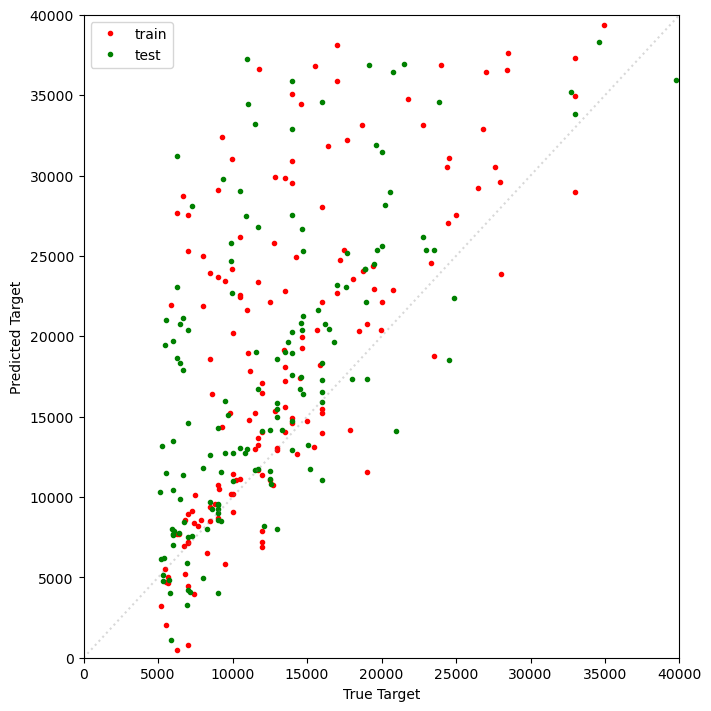

In [254]:
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    XGBoost_pipeline_final,
    X_final_train.head(200), y_final_train.head(200),
    X_final_test.head(200), y_final_test.head(200), 
    ax=ax
);
plt.xlim(0,40000)
plt.ylim(0,40000)

In [255]:
RandomForest_Model_Final.score(X_final_test, y_final_test)

-1.66859607292974

In [256]:
rmse(y_final_test, RandomForest_Model_Final.predict(X_final_test))

14851.510328107548

In [257]:
XGBoost_pipeline_final.score(X_final_test, y_final_test)

-2.827296030854508

In [258]:
rmse(y_final_test, XGBoost_pipeline_final.predict(X_final_test))

17785.874674458395

In [259]:
xgboost_pipe.score(X_final_test, y_final_test)

-2.5240070916817103

In [260]:
rmse(y_final_test, xgboost_pipe.predict(X_final_test))

17066.62268864605

In [261]:
voter.score(X_final_test, y_final_test)

0.9278357666316646

In [262]:
rmse(y_final_test, voter.predict(X_final_test))

2442.2504676525764

In [264]:
voter

VotingRegressor(estimators=[('gbr',
                             Pipeline(steps=[('pp',
                                              Pipeline(steps=[('feature_engg_transformer',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('num',
                                                                                                Pipeline(steps=[('scaler',
                                                                                                                 StandardScaler()),
                                                                                                                ('poly',
                                                                                                                 PolynomialFeatures(include_bias=False))]),
                                                                                                ['vehicle_condition',
                                                                                                 'mileage_pt',
                                                                                                 'vehicle_age']),
                                                                                               ('cat_1',
                                                                                                Pipeline(steps=[('ohe',
                                                                                                                 OneHotEnco...
                                                                                                                               handle_unknown='ignore',
                                                                                                                               sparse=False))]),
                                                                                                ['fuel_type',
                                                                                                 'body_type']),
                                                                                               ('cat_2',
                                                                                                Pipeline(steps=[('target',
                                                                                                                 TargetEncoder())]),
                                                                                                ['standard_make',
                                                                                                 'standard_model'])],
                                                                                 verbose_feature_names_out=False)),
                                                              ('featsel',
                                                               SelectKBest(k=20,
                                                                           score_func=<function f_regression at 0x0000019A183DF160>))])),
                                             ('regr',
                                              RandomForestRegressor(min_samples_split=5,
                                                                    n_estimators=200))]))])

### Global and Local Explanations with SHAP

In [267]:
voter = Pipeline(
    steps=[
        ('feature_engg_transformer',feature_engg_transformer),
        ("featsel", SelectKBest(f_regression, k=8)),
        ('regr', RandomForestRegressor(max_depth=None,
                      n_estimators=200))
    ]
).set_output(transform='pandas')

voter

Pipeline(steps=[('feature_engg_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['vehicle_condition',
                                                   'mileage_pt',
                                                   'vehicle_age']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuel_type', 'body_type']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['standard_make',
                                                   'standard_model'])],
                                   verbose_feature_names_out=False)),
                ('featsel',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x0000019A183DF160>)),
                ('regr', RandomForestRegressor(n_estimators=200))])

In [268]:
!pip install -q shap
import shap
shap.initjs()

Exact explainer: 1001it [00:21, 26.89it/s]                                                                             


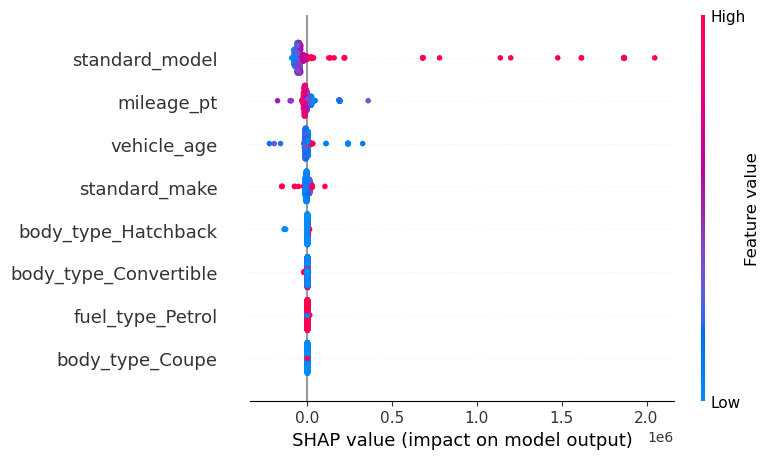

In [269]:
#global explaination of shap
X_pp = xgboost_pipe['feature_engg_transformer'].transform(X_test)
X_ppp = xgboost_pipe['select_k_best'].transform(X_pp)
X100 = shap.utils.sample(X_ppp, 1000) # 100 instances for use as the background distribution

explainer = shap.Explainer(xgboost_pipe['regr'].predict, X100)
shap_values = explainer(X100)

shap.summary_plot(shap_values, X100, max_display=8)

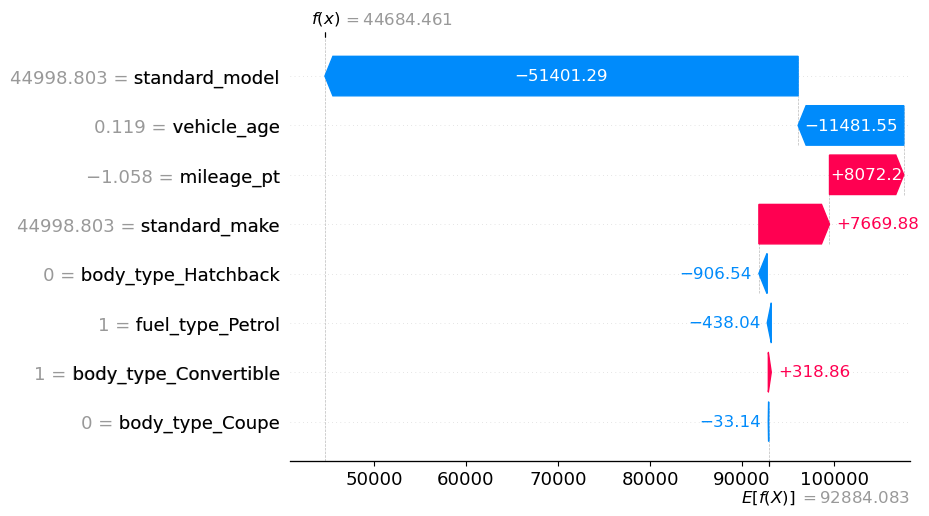

In [270]:
#local explaination of shap
shap.plots.waterfall(shap_values[3])

Exact explainer: 61801it [23:27, 43.51it/s]                                                                            


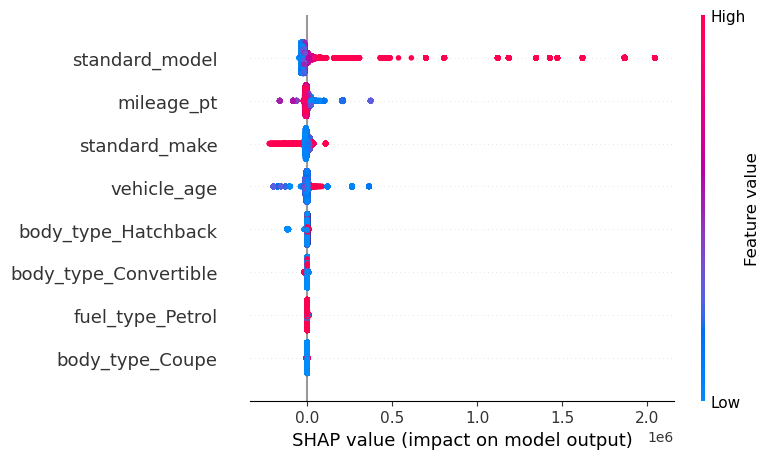

In [271]:
X_pp = xgboost_pipe['feature_engg_transformer'].transform(X_test)
X_ppp = xgboost_pipe['select_k_best'].transform(X_pp)
X100 = shap.utils.sample(X_ppp, 1000) # 100 instances for use as the background distribution

explainer = shap.Explainer(xgboost_pipe['regr'].predict, X_ppp)
shap_values = explainer(X_ppp)

shap.summary_plot(shap_values, X_ppp, max_display=8)

In [272]:
explainer = shap.TreeExplainer(xgboost_pipe['regr'])
shap_values_ = explainer.shap_values(X100)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [273]:

# Choose the index of the instance you want to visualize- local explaination
i =3
shap.force_plot(explainer.expected_value, shap_values_[i], X100.iloc[i])


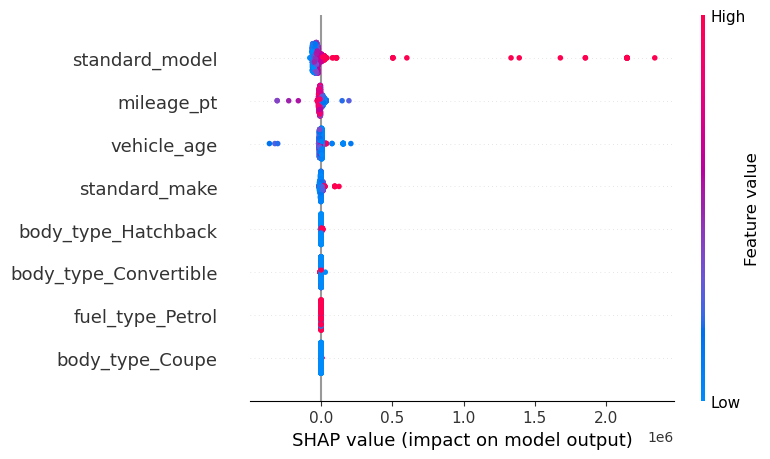

In [274]:
shap.summary_plot(shap_values_, X100) 

### Individual Conditional Expectation (ICE)

In [275]:
X_final['mileage_pt'].min(), X_final['mileage_pt'].max()

(-2.054485137363518, 3.055822739549785)

In [276]:
yf_final = y_final.sample(n=100, random_state=100)

In [277]:
mile_synth_data = np.linspace(X_final['mileage_pt'].min(), X_final['mileage_pt'].max(), 100)
mile_synth_data[:5], mile_synth_data[-5:]

(array([-2.05448514, -2.00286587, -1.95124659, -1.89962732, -1.84800805]),
 array([2.84934565, 2.90096493, 2.9525842 , 3.00420347, 3.05582274]))

In [278]:
mile_synth_data

array([-2.05448514, -2.00286587, -1.95124659, -1.89962732, -1.84800805,
       -1.79638878, -1.74476951, -1.69315024, -1.64153097, -1.58991169,
       -1.53829242, -1.48667315, -1.43505388, -1.38343461, -1.33181534,
       -1.28019607, -1.22857679, -1.17695752, -1.12533825, -1.07371898,
       -1.02209971, -0.97048044, -0.91886116, -0.86724189, -0.81562262,
       -0.76400335, -0.71238408, -0.66076481, -0.60914554, -0.55752626,
       -0.50590699, -0.45428772, -0.40266845, -0.35104918, -0.29942991,
       -0.24781064, -0.19619136, -0.14457209, -0.09295282, -0.04133355,
        0.01028572,  0.06190499,  0.11352426,  0.16514354,  0.21676281,
        0.26838208,  0.32000135,  0.37162062,  0.42323989,  0.47485917,
        0.52647844,  0.57809771,  0.62971698,  0.68133625,  0.73295552,
        0.78457479,  0.83619407,  0.88781334,  0.93943261,  0.99105188,
        1.04267115,  1.09429042,  1.14590969,  1.19752897,  1.24914824,
        1.30076751,  1.35238678,  1.40400605,  1.45562532,  1.50

In [279]:
ex_instance = X_final.sample(1, random_state=42).drop(columns='mileage_pt')
ex_instance

standard_make standard_model  vehicle_condition body_type fuel_type  \
48513           BMW       5 Series                  0    Saloon    Diesel   

       vehicle_age  
48513          6.0

In [280]:
mile_synth_df = pd.DataFrame(mile_synth_data, columns=['mileage_pt'])
mile_synth_df.head()

mileage_pt
0   -2.054485
1   -2.002866
2   -1.951247
3   -1.899627
4   -1.848008

In [281]:
synth_df = ex_instance.merge(mile_synth_df, how='cross')
print(synth_df.shape)
synth_df

(100, 7)


standard_make standard_model  vehicle_condition body_type fuel_type  \
0            BMW       5 Series                  0    Saloon    Diesel   
1            BMW       5 Series                  0    Saloon    Diesel   
2            BMW       5 Series                  0    Saloon    Diesel   
3            BMW       5 Series                  0    Saloon    Diesel   
4            BMW       5 Series                  0    Saloon    Diesel   
..           ...            ...                ...       ...       ...   
95           BMW       5 Series                  0    Saloon    Diesel   
96           BMW       5 Series                  0    Saloon    Diesel   
97           BMW       5 Series                  0    Saloon    Diesel   
98           BMW       5 Series                  0    Saloon    Diesel   
99           BMW       5 Series                  0    Saloon    Diesel   

    vehicle_age  mileage_pt  
0           6.0   -2.054485  
1           6.0   -2.002866  
2           6.0   -1.951247  
3           6.0   -1.899627  
4           6.0   -1.848008  
..          ...         ...  
95          6.0    2.849346  
96          6.0    2.900965  
97          6.0    2.952584  
98          6.0    3.004203  
99          6.0    3.055823  

[100 rows x 7 columns]

In [282]:
syn = voter.fit(synth_df, np.array(y_final.head(100)))

In [283]:
pred = voter.predict(synth_df)
pred[:5], pred[-5:]

(array([10119.2  , 12968.425, 12157.175, 24753.47 , 24779.98 ]),
 array([ 9631.805,  9996.67 , 12449.785, 21545.645, 17940.015]))

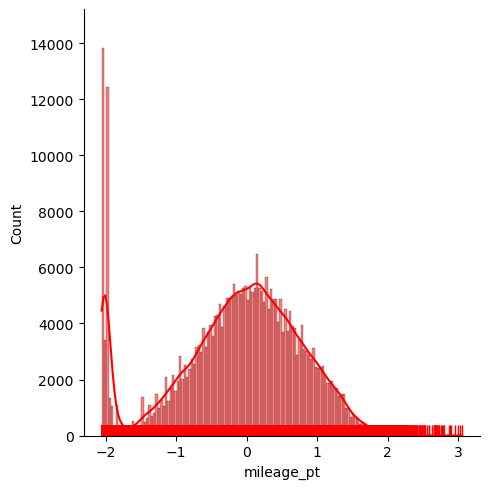

In [284]:
sns.displot(X_final['mileage_pt'], kde=True, rug=True);

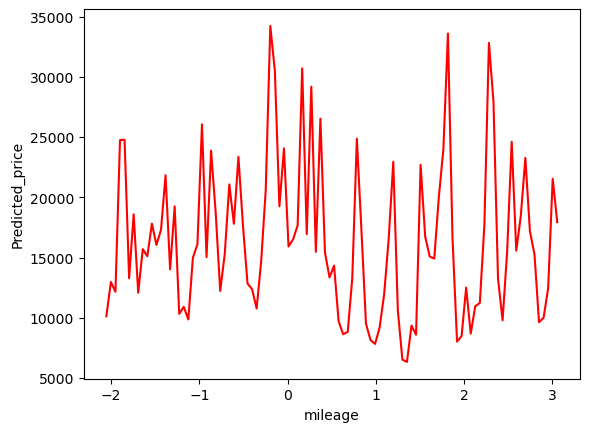

In [285]:
ax = sns.lineplot(x=synth_df['mileage_pt'], y=pred);
plt.xlabel('mileage', fontsize=10)
plt.ylabel('Predicted_price',fontsize=10);

In [320]:
rawdata_price

standard_make     standard_model  vehicle_condition  price  \
1             Jaguar                 XF                  0   7000   
2              SKODA               Yeti                  0  14000   
3           Vauxhall              Mokka                  0   7995   
4         Land Rover  Range Rover Sport                  0  26995   
5               Audi                 S5                  0  29000   
...              ...                ...                ...    ...   
401997        Nissan               Juke                  0  18000   
402000       Peugeot                208                  0  10595   
402002        Nissan            Qashqai                  0   7250   
402003        Abarth                595                  0  11490   
402004          Audi           A4 Avant                  0  20520   

          body_type fuel_type  mileage_pt  vehicle_age  
1            Saloon    Diesel    1.490253         12.0  
2               SUV    Petrol   -0.737127          6.0  
3         Hatchback    Diesel    0.499330          7.0  
4               SUV    Diesel    0.859137          8.0  
5       Convertible    Petrol   -0.323891          6.0  
...             ...       ...         ...          ...  
401997          SUV    Petrol   -1.027424          4.0  
402000    Hatchback    Petrol   -0.928204          4.0  
402002          SUV    Petrol    0.656096         11.0  
402003    Hatchback    Petrol   -0.592719          8.0  
402004       Estate    Diesel   -0.409167          9.0  

[328232 rows x 8 columns]

<AxesSubplot:xlabel='mileage_pt', ylabel='Density'>

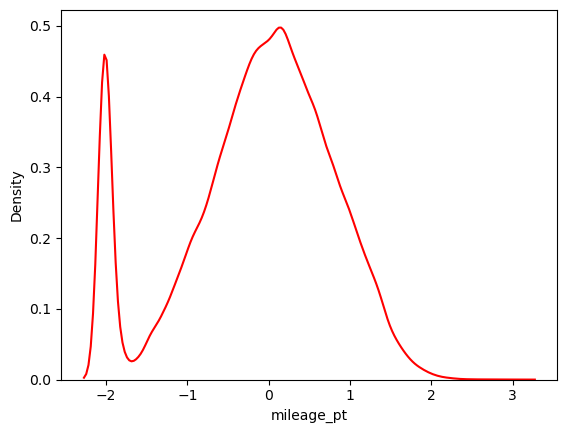

In [319]:
#check mileage's effect on price
sns.kdeplot(((rawdata_price['mileage_pt'])))

invalid value encountered in log2


<AxesSubplot:xlabel='mileage_pt', ylabel='Density'>

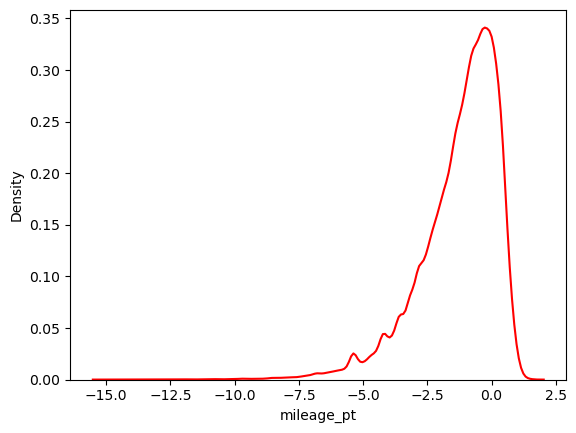

In [321]:
#check mileage's effect on price
sns.kdeplot((np.log2(rawdata_price['mileage_pt'])))

In [322]:
#update mileage feature
rawdata_m = rawdata.loc[(rawdata['mileage_pt'] >= -4) & (rawdata['mileage_pt'] <= 1)]

<AxesSubplot:xlabel='mileage_pt', ylabel='Density'>

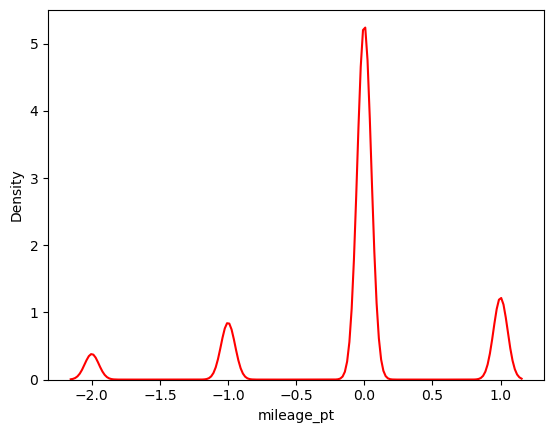

In [323]:
#check mileage's effect on price
sns.kdeplot(((rawdata_m['mileage_pt'])))

In [329]:
Xm,ym = rawdata_m.drop(columns='price'), rawdata_m['price']

In [330]:
kf = KFold(n_splits=5)

In [331]:
for train_index, test_index in kf.split(Xm):
    
    Xm_train, Xm_test = Xm.iloc[train_index], Xm.iloc[test_index]
    ym_train, ym_test = ym.iloc[train_index], ym.iloc[test_index]

In [292]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model_em = voter.fit(Xm_train.head(100000), ym_train.head(100000))
scores_em = cross_val_score(model_em, Xm_train.head(10000), ym_train.head(10000), cv=cv)
scores_em.mean(), scores_em.std()

(0.6723943916988957, 0.16889428231561193)

In [332]:
rmse(ym_test,
     voter.predict(Xm_test))

11951.925105887505

In [382]:
scoresm = cross_val_score(
    voter, Xm_train, ym_train, cv=10, scoring='neg_root_mean_squared_error'
)*-1
scoresm.mean(), scoresm.std()

(11062.088514392655, 4189.818553612641)

### Partial Dependency Plots

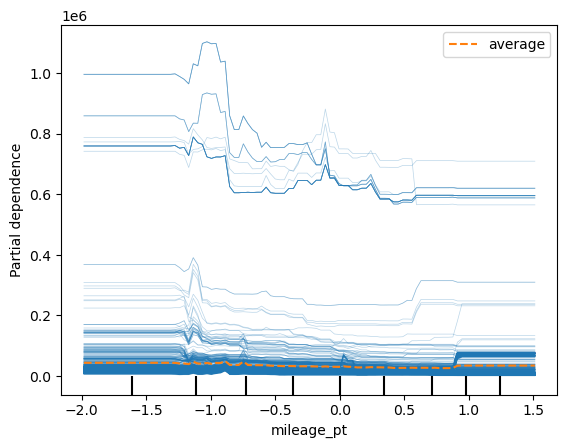

In [383]:
PartialDependenceDisplay.from_estimator(
    xgboost_pipe, X_test, features=['mileage_pt'], kind='both'
);

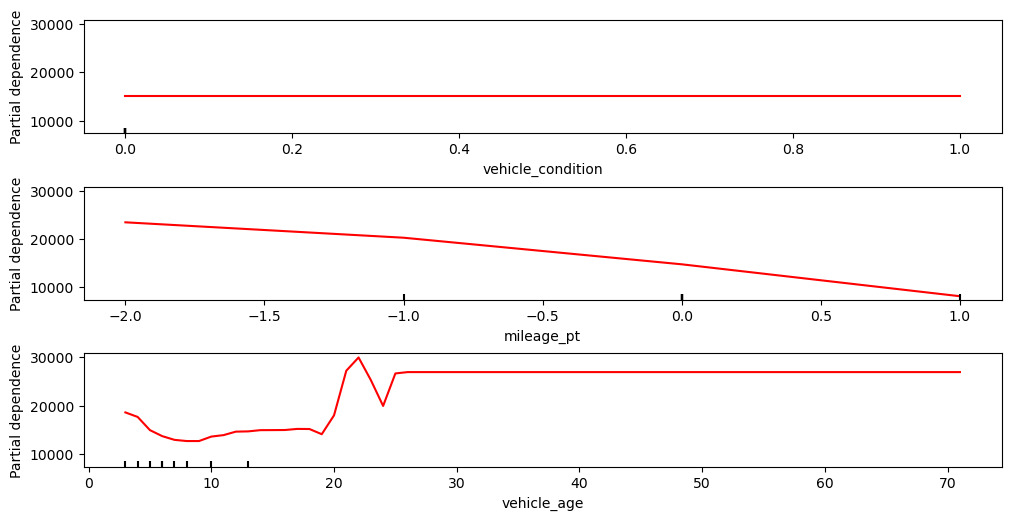

In [384]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    xgboost_pipe, Xm_test, features=Xm_test.select_dtypes(exclude='object').columns,
    kind='average', 
    subsample=100, grid_resolution=100, n_jobs=2, random_state=0,
    ax=ax, n_cols=1
);

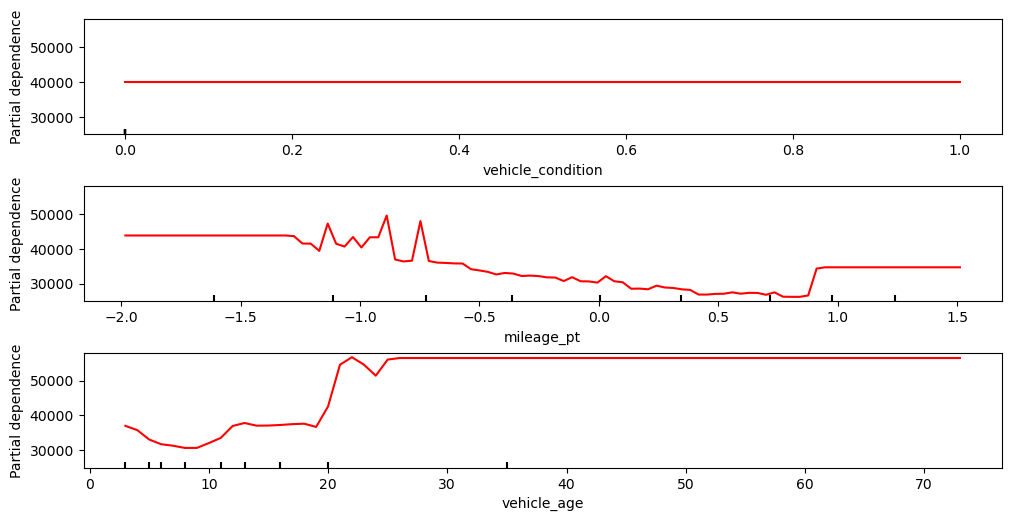

In [385]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    xgboost_pipe, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='average', 
    subsample=100, grid_resolution=100, n_jobs=2, random_state=0,
    ax=ax, n_cols=1
);

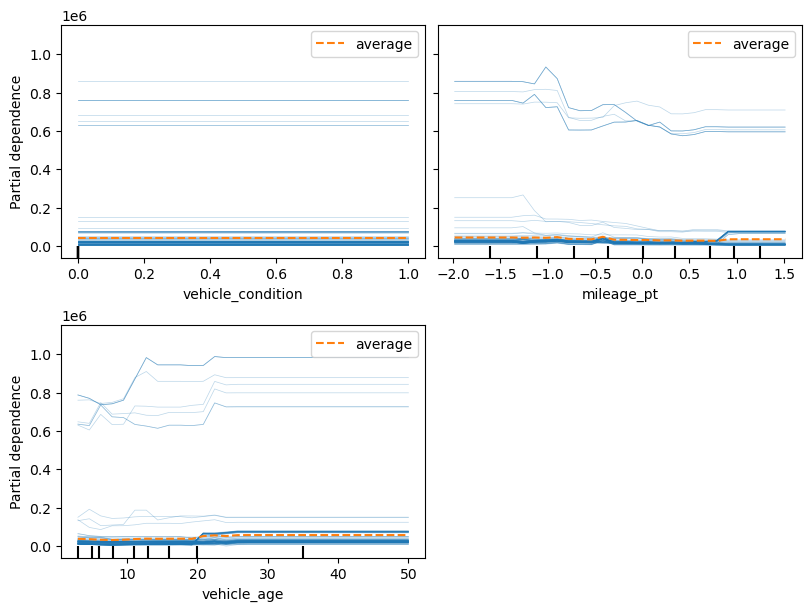

In [386]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    xgboost_pipe, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='both', 
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

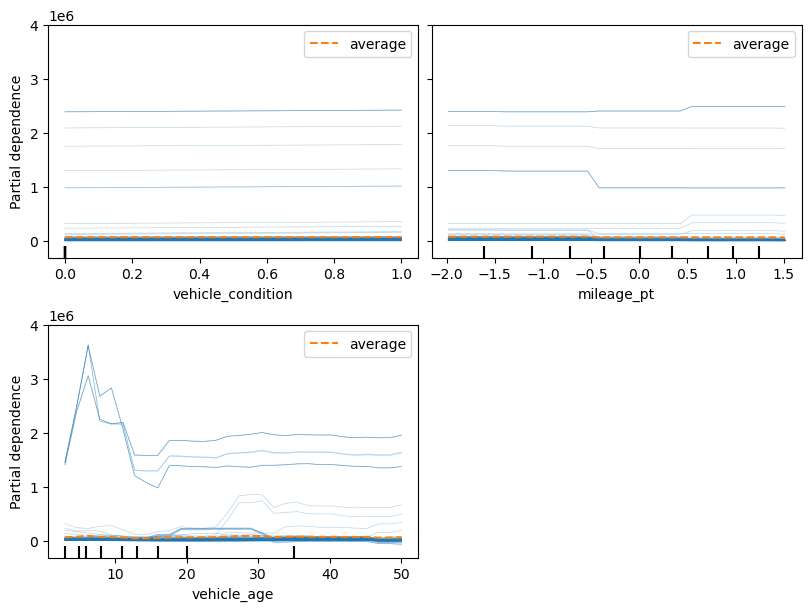

In [387]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    voter, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='both', 
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

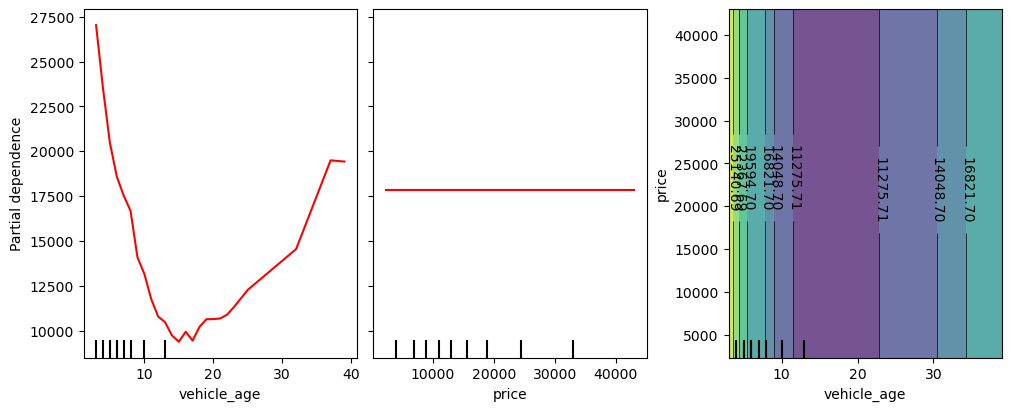

In [391]:
fig, ax = plt.subplots(figsize=(10,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    voter, rawdata.head(1000), 
    features=["vehicle_age", "price", ("vehicle_age", "price")],
    kind='average', 
    ax=ax, n_cols=3,
    subsample=50, grid_resolution=30, n_jobs=2, random_state=0,
);

Analysis:
	Vehicle condition don’t have much effect on price.
	Mileage has inverse effect on price
	Vehicle Age have slightly positive impact.


### Final Model

In [ ]:
# apply the analysis of PDP to get the final model.

In [333]:
rawdata.drop(columns='vehicle_condition')

standard_make     standard_model  price  body_type  \
0              Volvo               XC90  73970        SUV   
1             Jaguar                 XF   7000     Saloon   
2              SKODA               Yeti  14000        SUV   
3           Vauxhall              Mokka   7995  Hatchback   
4         Land Rover  Range Rover Sport  26995        SUV   
...              ...                ...    ...        ...   
402000       Peugeot                208  10595  Hatchback   
402001       Peugeot                107   2000  Hatchback   
402002        Nissan            Qashqai   7250        SUV   
402003        Abarth                595  11490  Hatchback   
402004          Audi           A4 Avant  20520     Estate   

                    fuel_type  mileage_pt  vehicle_age  
0       Petrol Plug-in Hybrid          -2          3.0  
1                      Diesel           1         12.0  
2                      Petrol           0          6.0  
3                      Diesel           0          7.0  
4                      Diesel           0          8.0  
...                       ...         ...          ...  
402000                 Petrol           0          4.0  
402001                 Petrol           1         14.0  
402002                 Petrol           0         11.0  
402003                 Petrol           0          8.0  
402004                 Diesel           0          9.0  

[399718 rows x 7 columns]

In [334]:
Xf,yf = rawdata.drop(columns='price'), rawdata['price']
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(Xf):
    
    Xf_train, Xf_test = Xf.iloc[train_index], Xf.iloc[test_index]
    yf_train, yf_test = yf.iloc[train_index], yf.iloc[test_index]

In [335]:
#Creating one pipeline for all models: 

def create_def_preprocessing_pipe(X):
    preprocessor = Pipeline(
        steps=[
            ('feature_engg_transformer',feature_engg_transformer),
            ("featsel", SelectKBest(f_regression, k=8))
        ]
        ).set_output(transform='pandas')
    return preprocessor

In [336]:
def create_regr_pipe(est, X):
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_def_preprocessing_pipe(X)),
            ("regr", est)
        ]
    ).set_output(transform="pandas")
    return regr_pipe

In [337]:
gbr = create_regr_pipe(xgb.XGBRegressor(), Xf_train)

In [338]:
rfr = create_regr_pipe(xgb.XGBRegressor(), Xf_train)

In [339]:
# Create a VotingRegressor ensemble
voter = VotingRegressor(estimators=[("gbr", gbr), ("rfr", rfr)])
voter.fit(Xf_train, yf_train)

VotingRegressor(estimators=[('gbr',
                             Pipeline(steps=[('pp',
                                              Pipeline(steps=[('feature_engg_transformer',
                                                               ColumnTransformer(remainder='passthrough',
                                                                                 transformers=[('num',
                                                                                                Pipeline(steps=[('scaler',
                                                                                                                 StandardScaler()),
                                                                                                                ('poly',
                                                                                                                 PolynomialFeatures(include_bias=False))]),
                                                                                                ['vehicle_condition',
                                                                                                 'mileage_pt',
                                                                                                 'vehicle_age']),
                                                                                               ('cat_1',
                                                                                                Pipeline(steps=[('ohe',
                                                                                                                 OneHotEnco...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]))])

(0.0, 40000.0)

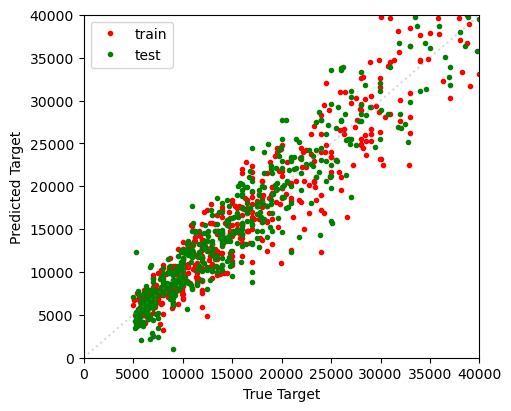

In [381]:
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
plot_true_vs_predicted(
    voter,
    X_final_train.head(500), y_final_train.head(500),
    X_final_test.head(500), y_final_test.head(500), 
    ax=ax
);
plt.xlim(0,40000)
plt.ylim(0,40000)

(0.0, 40000.0)

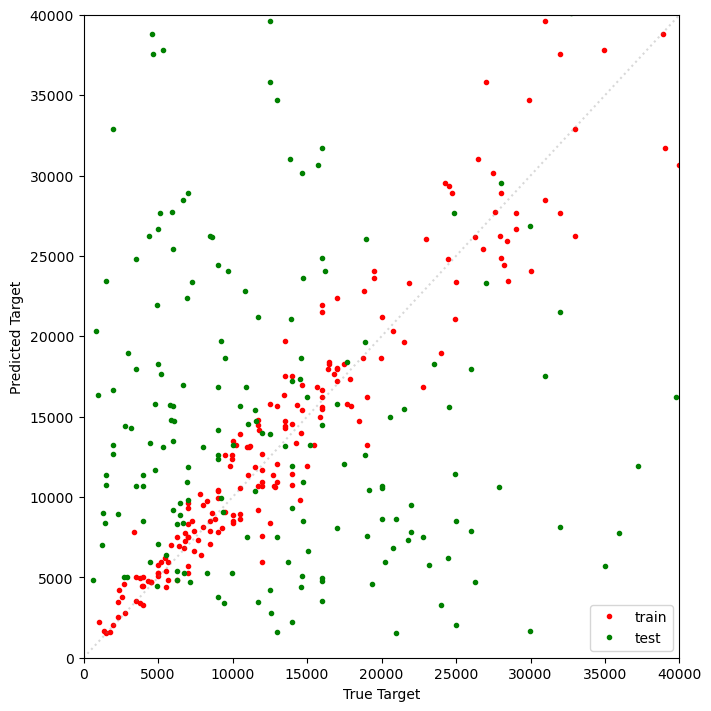

In [341]:
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    voter,
    Xf_train.head(200), yf_train.head(200),
    Xf_train.head(200), yf_test.head(200), 
    ax=ax
);
plt.xlim(0,40000)
plt.ylim(0,40000) 

#### evaluation metrics of the final model

In [353]:
voter.score(Xf_train, yf_train)

0.9519468603922224

In [354]:
voter.score(X_final_test, y_final_test)

0.8530791716286977

In [355]:
y_val

277523      6450
20567      19500
170626     44995
100176     15500
195639     44000
           ...  
266206      3500
8768        8490
112971     11490
153135    199999
125335     22995
Name: price, Length: 61800, dtype: int64

In [356]:
y_test_23rd_row = y_val.iloc[2556]
y_test_23rd_row

29995

In [357]:
prediction = voter.predict(X_test[2556:2557])
prediction

array([8820.048], dtype=float32)

In [358]:
rmse(yf_train, voter.predict(Xf_train))

5570.472143900457

In [359]:
rmse(y_test, voter.predict(X_test))

52537.67852676654

In [360]:
voter.score(X_val, y_val)

0.9661116648092041

In [361]:
voter.score(X_test, y_test)

0.9676941842107847

In [380]:
voter.score(Xm_test, ym_test)

0.8232231277633517

In [ ]:
voter.score(Xm_val, ym_val)

In [362]:
rmse(y_test, voter.predict(X_test))

52537.67852676654

In [363]:
rmse(y_val, voter.predict(X_val))

53477.67479240216

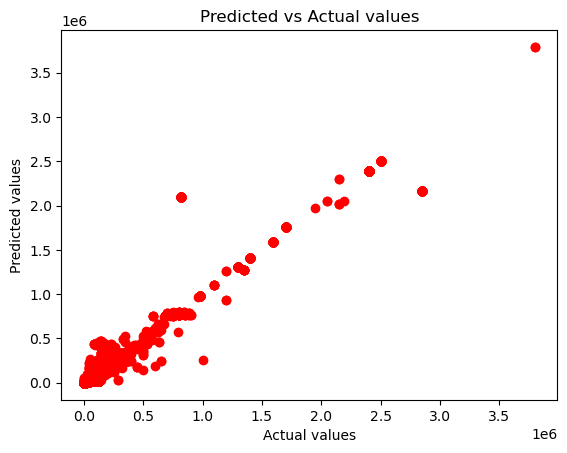

In [364]:
plt.scatter(y_val, y=voter.predict(X_val))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()

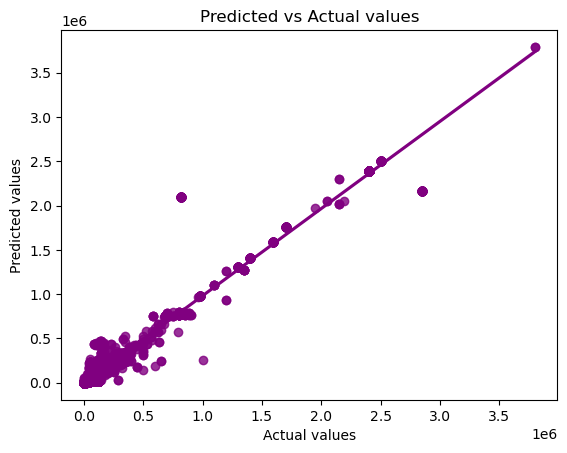

In [371]:
sns.regplot(x=y_val, y=voter.predict(X_val), color='purple')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()

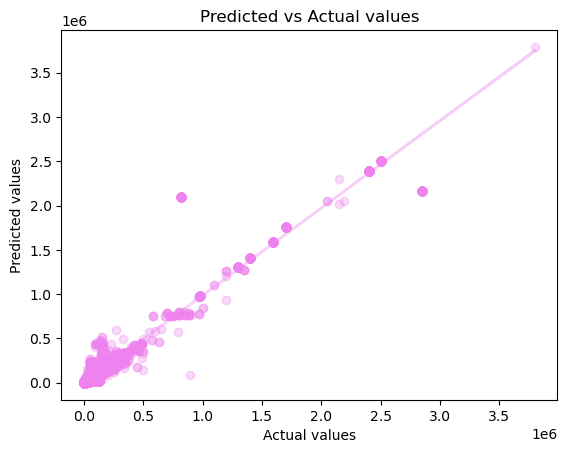

In [378]:
sns.regplot(x=y_test, y=voter.predict(X_test), scatter_kws={'alpha':0.3}, line_kws={'alpha': 0.3}, color='violet')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()